<img src="../images/headers/nb_4.svg"  width="1080" height="220">

The objective of this notebook is to apply artificial neural network models to the
tabular data used in notebook 3.

First, a simple dense nn will be trained. The task will be treated as classification.
This means, that the model will ignore that we have ordered categories.
Second, a dense nn will be trained using an ordinal layer, an ordinal loss function and
ordinal metrics provided by the coral_ordinal package.

The models will be compared with regard to their accuracy.


# Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import coral_ordinal as coral
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from roaf import visualization

In [2]:
plt.style.use("dark_background")
plt.set_cmap("Dark2")
sns.set_palette("Dark2")

<Figure size 640x480 with 0 Axes>

In [3]:
FAST_EXECUTION = False
N_EPOCHS = 20

In [4]:
TRAIN_FILENAME = "Xy_train"
TEST_FILENAME = "Xy_test"

if FAST_EXECUTION:
    TRAIN_FILENAME = "TESTING_" + TRAIN_FILENAME
    TEST_FILENAME = "TESTING_" + TEST_FILENAME

train = pd.read_parquet("../data/processed/" + TRAIN_FILENAME + ".parquet")
test = pd.read_parquet("../data/processed/" + TEST_FILENAME + ".parquet")

In [5]:
X_train = train.drop(columns="severity")
y_train = train["severity"]
X_test = test.drop(columns="severity")
y_test = test["severity"]

# ANN Models with Keras

In [6]:
models_df = pd.DataFrame(  # pylint: disable=C0103
    columns=["model", "history", "i_color", "metric"]
).rename_axis(index="model_name")

## Simple Dense Layer Network Classifier

In [7]:
MODEL_ID = "ann"
DROPOUT_RATE = 0.3
models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(
            units=32, activation="gelu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(units=3, activation="softmax"),
    ],
    name="Dense_ANN",
)

# get index fo
models_df.loc[MODEL_ID, "model"].compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(
    factor=0.75, patience=6, cooldown=10, min_lr=0.0001
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
callbacks = [reduce_lr_callback, early_stopping]

In [8]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 13:05 - loss: 1.7019 - accuracy: 0.2500 - mean_absolute_error_labels: 2.0000

 20/641 [..............................] - ETA: 1s - loss: 1.6894 - accuracy: 0.3031 - mean_absolute_error_labels: 1.9359   

 39/641 [>.............................] - ETA: 1s - loss: 1.5401 - accuracy: 0.3365 - mean_absolute_error_labels: 1.9776

 62/641 [=>............................] - ETA: 1s - loss: 1.4621 - accuracy: 0.3589 - mean_absolute_error_labels: 2.0106

 86/641 [===>..........................] - ETA: 1s - loss: 1.3800 - accuracy: 0.3950 - mean_absolute_error_labels: 2.0153

110/641 [====>.........................] - ETA: 1s - loss: 1.3288 - accuracy: 0.4139 - mean_absolute_error_labels: 2.0023

134/641 [=====>........................] - ETA: 1s - loss: 1.2797 - accuracy: 0.4296 - mean_absolute_error_labels: 1.9991

159/641 [======>.......................] - ETA: 1s - loss: 1.2455 - accuracy: 0.4442 - mean_absolute_error_labels: 1.9931

184/641 [=======>......................] - ETA: 1s - loss: 1.2133 - accuracy: 0.4548 - mean_absolute_error_labels: 1.9966

204/641 [========>.....................] - ETA: 0s - loss: 1.1917 - accuracy: 0.4637 - mean_absolute_error_labels: 2.0015

227/641 [=========>....................] - ETA: 0s - loss: 1.1668 - accuracy: 0.4754 - mean_absolute_error_labels: 1.9986

251/641 [==========>...................] - ETA: 0s - loss: 1.1457 - accuracy: 0.4827 - mean_absolute_error_labels: 1.9964

275/641 [===========>..................] - ETA: 0s - loss: 1.1224 - accuracy: 0.4949 - mean_absolute_error_labels: 1.9970

300/641 [=============>................] - ETA: 0s - loss: 1.1077 - accuracy: 0.5013 - mean_absolute_error_labels: 1.9948

323/641 [==============>...............] - ETA: 0s - loss: 1.0933 - accuracy: 0.5053 - mean_absolute_error_labels: 1.9963

345/641 [===============>..............] - ETA: 0s - loss: 1.0857 - accuracy: 0.5096 - mean_absolute_error_labels: 1.9962

366/641 [================>.............] - ETA: 0s - loss: 1.0748 - accuracy: 0.5141 - mean_absolute_error_labels: 1.9939

391/641 [=================>............] - ETA: 0s - loss: 1.0666 - accuracy: 0.5177 - mean_absolute_error_labels: 1.9970

415/641 [==================>...........] - ETA: 0s - loss: 1.0539 - accuracy: 0.5231 - mean_absolute_error_labels: 1.9976

436/641 [===================>..........] - ETA: 0s - loss: 1.0471 - accuracy: 0.5259 - mean_absolute_error_labels: 1.9966

458/641 [====================>.........] - ETA: 0s - loss: 1.0379 - accuracy: 0.5316 - mean_absolute_error_labels: 1.9972

480/641 [=====================>........] - ETA: 0s - loss: 1.0318 - accuracy: 0.5341 - mean_absolute_error_labels: 2.0003

498/641 [======================>.......] - ETA: 0s - loss: 1.0239 - accuracy: 0.5373 - mean_absolute_error_labels: 1.9994

515/641 [=======================>......] - ETA: 0s - loss: 1.0185 - accuracy: 0.5397 - mean_absolute_error_labels: 2.0009

528/641 [=======================>......] - ETA: 0s - loss: 1.0139 - accuracy: 0.5421 - mean_absolute_error_labels: 2.0016

547/641 [========================>.....] - ETA: 0s - loss: 1.0083 - accuracy: 0.5443 - mean_absolute_error_labels: 2.0026

565/641 [=========================>....] - ETA: 0s - loss: 1.0025 - accuracy: 0.5465 - mean_absolute_error_labels: 2.0034

583/641 [==========================>...] - ETA: 0s - loss: 0.9967 - accuracy: 0.5494 - mean_absolute_error_labels: 2.0021

601/641 [===========================>..] - ETA: 0s - loss: 0.9929 - accuracy: 0.5513 - mean_absolute_error_labels: 2.0027

626/641 [============================>.] - ETA: 0s - loss: 0.9868 - accuracy: 0.5535 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 3s 3ms/step - loss: 0.9838 - accuracy: 0.5549 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8282 - val_accuracy: 0.6276 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 2/20


  1/641 [..............................] - ETA: 2s - loss: 0.8931 - accuracy: 0.5938 - mean_absolute_error_labels: 2.0312

 23/641 [>.............................] - ETA: 1s - loss: 0.8158 - accuracy: 0.6277 - mean_absolute_error_labels: 2.0068

 46/641 [=>............................] - ETA: 1s - loss: 0.8126 - accuracy: 0.6270 - mean_absolute_error_labels: 1.9878

 69/641 [==>...........................] - ETA: 1s - loss: 0.8111 - accuracy: 0.6313 - mean_absolute_error_labels: 1.9932

 93/641 [===>..........................] - ETA: 1s - loss: 0.8217 - accuracy: 0.6263 - mean_absolute_error_labels: 1.9886

116/641 [====>.........................] - ETA: 1s - loss: 0.8217 - accuracy: 0.6285 - mean_absolute_error_labels: 1.9957

140/641 [=====>........................] - ETA: 1s - loss: 0.8271 - accuracy: 0.6254 - mean_absolute_error_labels: 1.9978

164/641 [======>.......................] - ETA: 1s - loss: 0.8350 - accuracy: 0.6231 - mean_absolute_error_labels: 2.0013

187/641 [=======>......................] - ETA: 1s - loss: 0.8277 - accuracy: 0.6258 - mean_absolute_error_labels: 2.0033

210/641 [========>.....................] - ETA: 0s - loss: 0.8278 - accuracy: 0.6254 - mean_absolute_error_labels: 2.0058

234/641 [=========>....................] - ETA: 0s - loss: 0.8300 - accuracy: 0.6239 - mean_absolute_error_labels: 1.9972

258/641 [===========>..................] - ETA: 0s - loss: 0.8330 - accuracy: 0.6210 - mean_absolute_error_labels: 2.0011

282/641 [============>.................] - ETA: 0s - loss: 0.8330 - accuracy: 0.6216 - mean_absolute_error_labels: 1.9980

306/641 [=============>................] - ETA: 0s - loss: 0.8329 - accuracy: 0.6206 - mean_absolute_error_labels: 1.9975

328/641 [==============>...............] - ETA: 0s - loss: 0.8298 - accuracy: 0.6224 - mean_absolute_error_labels: 2.0002

352/641 [===============>..............] - ETA: 0s - loss: 0.8276 - accuracy: 0.6220 - mean_absolute_error_labels: 1.9998

376/641 [================>.............] - ETA: 0s - loss: 0.8291 - accuracy: 0.6220 - mean_absolute_error_labels: 2.0002

400/641 [=================>............] - ETA: 0s - loss: 0.8268 - accuracy: 0.6232 - mean_absolute_error_labels: 2.0014

425/641 [==================>...........] - ETA: 0s - loss: 0.8243 - accuracy: 0.6246 - mean_absolute_error_labels: 2.0025

448/641 [===================>..........] - ETA: 0s - loss: 0.8256 - accuracy: 0.6242 - mean_absolute_error_labels: 2.0058

472/641 [=====================>........] - ETA: 0s - loss: 0.8227 - accuracy: 0.6259 - mean_absolute_error_labels: 2.0059

495/641 [======================>.......] - ETA: 0s - loss: 0.8216 - accuracy: 0.6259 - mean_absolute_error_labels: 2.0054

517/641 [=======================>......] - ETA: 0s - loss: 0.8222 - accuracy: 0.6258 - mean_absolute_error_labels: 2.0051

538/641 [========================>.....] - ETA: 0s - loss: 0.8214 - accuracy: 0.6269 - mean_absolute_error_labels: 2.0063

560/641 [=========================>....] - ETA: 0s - loss: 0.8213 - accuracy: 0.6272 - mean_absolute_error_labels: 2.0065

580/641 [==========================>...] - ETA: 0s - loss: 0.8224 - accuracy: 0.6265 - mean_absolute_error_labels: 2.0058

601/641 [===========================>..] - ETA: 0s - loss: 0.8218 - accuracy: 0.6273 - mean_absolute_error_labels: 2.0044

622/641 [============================>.] - ETA: 0s - loss: 0.8209 - accuracy: 0.6278 - mean_absolute_error_labels: 2.0042

641/641 [==============================] - 2s 3ms/step - loss: 0.8212 - accuracy: 0.6277 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8105 - val_accuracy: 0.6417 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 3/20


  1/641 [..............................] - ETA: 2s - loss: 0.6800 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0938

 25/641 [>.............................] - ETA: 1s - loss: 0.7960 - accuracy: 0.6388 - mean_absolute_error_labels: 2.0325

 49/641 [=>............................] - ETA: 1s - loss: 0.8019 - accuracy: 0.6307 - mean_absolute_error_labels: 2.0210

 74/641 [==>...........................] - ETA: 1s - loss: 0.7891 - accuracy: 0.6402 - mean_absolute_error_labels: 2.0228

 98/641 [===>..........................] - ETA: 1s - loss: 0.7946 - accuracy: 0.6387 - mean_absolute_error_labels: 2.0092

122/641 [====>.........................] - ETA: 1s - loss: 0.7994 - accuracy: 0.6363 - mean_absolute_error_labels: 2.0079

146/641 [=====>........................] - ETA: 1s - loss: 0.7974 - accuracy: 0.6381 - mean_absolute_error_labels: 2.0041

170/641 [======>.......................] - ETA: 0s - loss: 0.7984 - accuracy: 0.6403 - mean_absolute_error_labels: 2.0088

195/641 [========>.....................] - ETA: 0s - loss: 0.7953 - accuracy: 0.6409 - mean_absolute_error_labels: 2.0053

217/641 [=========>....................] - ETA: 0s - loss: 0.7928 - accuracy: 0.6408 - mean_absolute_error_labels: 1.9983

241/641 [==========>...................] - ETA: 0s - loss: 0.7923 - accuracy: 0.6428 - mean_absolute_error_labels: 1.9977

263/641 [===========>..................] - ETA: 0s - loss: 0.7950 - accuracy: 0.6418 - mean_absolute_error_labels: 2.0023

285/641 [============>.................] - ETA: 0s - loss: 0.7926 - accuracy: 0.6436 - mean_absolute_error_labels: 2.0012

308/641 [=============>................] - ETA: 0s - loss: 0.7937 - accuracy: 0.6421 - mean_absolute_error_labels: 2.0008

331/641 [==============>...............] - ETA: 0s - loss: 0.7963 - accuracy: 0.6411 - mean_absolute_error_labels: 2.0015

355/641 [===============>..............] - ETA: 0s - loss: 0.7963 - accuracy: 0.6422 - mean_absolute_error_labels: 1.9996

378/641 [================>.............] - ETA: 0s - loss: 0.7973 - accuracy: 0.6415 - mean_absolute_error_labels: 1.9991

404/641 [=================>............] - ETA: 0s - loss: 0.7974 - accuracy: 0.6421 - mean_absolute_error_labels: 2.0016

427/641 [==================>...........] - ETA: 0s - loss: 0.7973 - accuracy: 0.6423 - mean_absolute_error_labels: 2.0012

452/641 [====================>.........] - ETA: 0s - loss: 0.7958 - accuracy: 0.6433 - mean_absolute_error_labels: 2.0017

476/641 [=====================>........] - ETA: 0s - loss: 0.7965 - accuracy: 0.6418 - mean_absolute_error_labels: 2.0019

500/641 [======================>.......] - ETA: 0s - loss: 0.7983 - accuracy: 0.6406 - mean_absolute_error_labels: 2.0003

523/641 [=======================>......] - ETA: 0s - loss: 0.7983 - accuracy: 0.6407 - mean_absolute_error_labels: 2.0019

547/641 [========================>.....] - ETA: 0s - loss: 0.7968 - accuracy: 0.6416 - mean_absolute_error_labels: 2.0001

573/641 [=========================>....] - ETA: 0s - loss: 0.7981 - accuracy: 0.6408 - mean_absolute_error_labels: 1.9995

598/641 [==========================>...] - ETA: 0s - loss: 0.7964 - accuracy: 0.6413 - mean_absolute_error_labels: 1.9999

622/641 [============================>.] - ETA: 0s - loss: 0.7965 - accuracy: 0.6411 - mean_absolute_error_labels: 2.0017

641/641 [==============================] - 2s 2ms/step - loss: 0.7957 - accuracy: 0.6414 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7953 - val_accuracy: 0.6461 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 4/20


  1/641 [..............................] - ETA: 2s - loss: 0.8461 - accuracy: 0.5625 - mean_absolute_error_labels: 1.9062

 24/641 [>.............................] - ETA: 1s - loss: 0.7580 - accuracy: 0.6602 - mean_absolute_error_labels: 1.9961

 49/641 [=>............................] - ETA: 1s - loss: 0.7862 - accuracy: 0.6511 - mean_absolute_error_labels: 2.0070

 73/641 [==>...........................] - ETA: 1s - loss: 0.7815 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0214

 97/641 [===>..........................] - ETA: 1s - loss: 0.7797 - accuracy: 0.6553 - mean_absolute_error_labels: 2.0061

122/641 [====>.........................] - ETA: 1s - loss: 0.7732 - accuracy: 0.6575 - mean_absolute_error_labels: 2.0126

146/641 [=====>........................] - ETA: 1s - loss: 0.7755 - accuracy: 0.6537 - mean_absolute_error_labels: 2.0199

169/641 [======>.......................] - ETA: 1s - loss: 0.7813 - accuracy: 0.6520 - mean_absolute_error_labels: 2.0153

191/641 [=======>......................] - ETA: 0s - loss: 0.7803 - accuracy: 0.6512 - mean_absolute_error_labels: 2.0160

214/641 [=========>....................] - ETA: 0s - loss: 0.7821 - accuracy: 0.6481 - mean_absolute_error_labels: 2.0107

237/641 [==========>...................] - ETA: 0s - loss: 0.7778 - accuracy: 0.6522 - mean_absolute_error_labels: 2.0071

260/641 [===========>..................] - ETA: 0s - loss: 0.7785 - accuracy: 0.6523 - mean_absolute_error_labels: 2.0048

284/641 [============>.................] - ETA: 0s - loss: 0.7813 - accuracy: 0.6502 - mean_absolute_error_labels: 2.0039

308/641 [=============>................] - ETA: 0s - loss: 0.7859 - accuracy: 0.6496 - mean_absolute_error_labels: 2.0056

333/641 [==============>...............] - ETA: 0s - loss: 0.7882 - accuracy: 0.6488 - mean_absolute_error_labels: 2.0060

357/641 [===============>..............] - ETA: 0s - loss: 0.7871 - accuracy: 0.6484 - mean_absolute_error_labels: 2.0049

380/641 [================>.............] - ETA: 0s - loss: 0.7855 - accuracy: 0.6498 - mean_absolute_error_labels: 2.0051

407/641 [==================>...........] - ETA: 0s - loss: 0.7858 - accuracy: 0.6490 - mean_absolute_error_labels: 2.0053

431/641 [===================>..........] - ETA: 0s - loss: 0.7839 - accuracy: 0.6494 - mean_absolute_error_labels: 2.0048

456/641 [====================>.........] - ETA: 0s - loss: 0.7852 - accuracy: 0.6479 - mean_absolute_error_labels: 2.0038

479/641 [=====================>........] - ETA: 0s - loss: 0.7846 - accuracy: 0.6484 - mean_absolute_error_labels: 2.0032

503/641 [======================>.......] - ETA: 0s - loss: 0.7840 - accuracy: 0.6485 - mean_absolute_error_labels: 2.0024

528/641 [=======================>......] - ETA: 0s - loss: 0.7836 - accuracy: 0.6491 - mean_absolute_error_labels: 2.0031

552/641 [========================>.....] - ETA: 0s - loss: 0.7835 - accuracy: 0.6492 - mean_absolute_error_labels: 2.0039

576/641 [=========================>....] - ETA: 0s - loss: 0.7835 - accuracy: 0.6505 - mean_absolute_error_labels: 2.0037

600/641 [===========================>..] - ETA: 0s - loss: 0.7844 - accuracy: 0.6498 - mean_absolute_error_labels: 2.0062

622/641 [============================>.] - ETA: 0s - loss: 0.7837 - accuracy: 0.6501 - mean_absolute_error_labels: 2.0041

641/641 [==============================] - 2s 2ms/step - loss: 0.7840 - accuracy: 0.6496 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7922 - val_accuracy: 0.6452 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 5/20


  1/641 [..............................] - ETA: 2s - loss: 0.6841 - accuracy: 0.6875 - mean_absolute_error_labels: 1.9062

 25/641 [>.............................] - ETA: 1s - loss: 0.7558 - accuracy: 0.6562 - mean_absolute_error_labels: 1.9525

 48/641 [=>............................] - ETA: 1s - loss: 0.7623 - accuracy: 0.6589 - mean_absolute_error_labels: 1.9863

 74/641 [==>...........................] - ETA: 1s - loss: 0.7696 - accuracy: 0.6537 - mean_absolute_error_labels: 1.9907

100/641 [===>..........................] - ETA: 1s - loss: 0.7734 - accuracy: 0.6528 - mean_absolute_error_labels: 2.0016

125/641 [====>.........................] - ETA: 1s - loss: 0.7768 - accuracy: 0.6507 - mean_absolute_error_labels: 1.9987

150/641 [======>.......................] - ETA: 1s - loss: 0.7749 - accuracy: 0.6483 - mean_absolute_error_labels: 1.9965

174/641 [=======>......................] - ETA: 0s - loss: 0.7746 - accuracy: 0.6449 - mean_absolute_error_labels: 1.9926

198/641 [========>.....................] - ETA: 0s - loss: 0.7721 - accuracy: 0.6454 - mean_absolute_error_labels: 1.9949

223/641 [=========>....................] - ETA: 0s - loss: 0.7724 - accuracy: 0.6471 - mean_absolute_error_labels: 1.9936

245/641 [==========>...................] - ETA: 0s - loss: 0.7683 - accuracy: 0.6501 - mean_absolute_error_labels: 1.9936

268/641 [===========>..................] - ETA: 0s - loss: 0.7688 - accuracy: 0.6509 - mean_absolute_error_labels: 1.9949

291/641 [============>.................] - ETA: 0s - loss: 0.7681 - accuracy: 0.6508 - mean_absolute_error_labels: 1.9932

314/641 [=============>................] - ETA: 0s - loss: 0.7687 - accuracy: 0.6511 - mean_absolute_error_labels: 1.9938

337/641 [==============>...............] - ETA: 0s - loss: 0.7674 - accuracy: 0.6514 - mean_absolute_error_labels: 1.9960

359/641 [===============>..............] - ETA: 0s - loss: 0.7659 - accuracy: 0.6526 - mean_absolute_error_labels: 1.9974

381/641 [================>.............] - ETA: 0s - loss: 0.7688 - accuracy: 0.6506 - mean_absolute_error_labels: 1.9998

404/641 [=================>............] - ETA: 0s - loss: 0.7675 - accuracy: 0.6521 - mean_absolute_error_labels: 1.9990

426/641 [==================>...........] - ETA: 0s - loss: 0.7671 - accuracy: 0.6534 - mean_absolute_error_labels: 1.9977

450/641 [====================>.........] - ETA: 0s - loss: 0.7680 - accuracy: 0.6522 - mean_absolute_error_labels: 2.0001

472/641 [=====================>........] - ETA: 0s - loss: 0.7701 - accuracy: 0.6512 - mean_absolute_error_labels: 2.0003

495/641 [======================>.......] - ETA: 0s - loss: 0.7699 - accuracy: 0.6520 - mean_absolute_error_labels: 2.0006

517/641 [=======================>......] - ETA: 0s - loss: 0.7712 - accuracy: 0.6518 - mean_absolute_error_labels: 2.0019

540/641 [========================>.....] - ETA: 0s - loss: 0.7713 - accuracy: 0.6525 - mean_absolute_error_labels: 2.0039

563/641 [=========================>....] - ETA: 0s - loss: 0.7719 - accuracy: 0.6526 - mean_absolute_error_labels: 2.0041

586/641 [==========================>...] - ETA: 0s - loss: 0.7715 - accuracy: 0.6526 - mean_absolute_error_labels: 2.0021

607/641 [===========================>..] - ETA: 0s - loss: 0.7726 - accuracy: 0.6518 - mean_absolute_error_labels: 2.0037

630/641 [============================>.] - ETA: 0s - loss: 0.7736 - accuracy: 0.6506 - mean_absolute_error_labels: 2.0035

641/641 [==============================] - 2s 3ms/step - loss: 0.7737 - accuracy: 0.6506 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7905 - val_accuracy: 0.6482 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 6/20


  1/641 [..............................] - ETA: 2s - loss: 0.9310 - accuracy: 0.6562 - mean_absolute_error_labels: 1.7812

 19/641 [..............................] - ETA: 1s - loss: 0.7415 - accuracy: 0.6891 - mean_absolute_error_labels: 1.9622

 40/641 [>.............................] - ETA: 1s - loss: 0.7728 - accuracy: 0.6664 - mean_absolute_error_labels: 1.9422

 63/641 [=>............................] - ETA: 1s - loss: 0.7721 - accuracy: 0.6662 - mean_absolute_error_labels: 1.9856

 84/641 [==>...........................] - ETA: 1s - loss: 0.7739 - accuracy: 0.6629 - mean_absolute_error_labels: 1.9766

107/641 [====>.........................] - ETA: 1s - loss: 0.7684 - accuracy: 0.6641 - mean_absolute_error_labels: 1.9810

130/641 [=====>........................] - ETA: 1s - loss: 0.7723 - accuracy: 0.6553 - mean_absolute_error_labels: 1.9875

150/641 [======>.......................] - ETA: 1s - loss: 0.7722 - accuracy: 0.6538 - mean_absolute_error_labels: 1.9908

172/641 [=======>......................] - ETA: 1s - loss: 0.7740 - accuracy: 0.6530 - mean_absolute_error_labels: 1.9916

194/641 [========>.....................] - ETA: 1s - loss: 0.7753 - accuracy: 0.6498 - mean_absolute_error_labels: 1.9940

216/641 [=========>....................] - ETA: 1s - loss: 0.7777 - accuracy: 0.6471 - mean_absolute_error_labels: 1.9926

239/641 [==========>...................] - ETA: 0s - loss: 0.7756 - accuracy: 0.6502 - mean_absolute_error_labels: 1.9967

262/641 [===========>..................] - ETA: 0s - loss: 0.7751 - accuracy: 0.6510 - mean_absolute_error_labels: 1.9967

285/641 [============>.................] - ETA: 0s - loss: 0.7770 - accuracy: 0.6509 - mean_absolute_error_labels: 1.9984

309/641 [=============>................] - ETA: 0s - loss: 0.7778 - accuracy: 0.6502 - mean_absolute_error_labels: 1.9991

333/641 [==============>...............] - ETA: 0s - loss: 0.7760 - accuracy: 0.6524 - mean_absolute_error_labels: 2.0008

357/641 [===============>..............] - ETA: 0s - loss: 0.7743 - accuracy: 0.6544 - mean_absolute_error_labels: 2.0029

380/641 [================>.............] - ETA: 0s - loss: 0.7742 - accuracy: 0.6543 - mean_absolute_error_labels: 2.0036

403/641 [=================>............] - ETA: 0s - loss: 0.7727 - accuracy: 0.6549 - mean_absolute_error_labels: 2.0056

427/641 [==================>...........] - ETA: 0s - loss: 0.7691 - accuracy: 0.6560 - mean_absolute_error_labels: 2.0053

451/641 [====================>.........] - ETA: 0s - loss: 0.7695 - accuracy: 0.6553 - mean_absolute_error_labels: 2.0084

474/641 [=====================>........] - ETA: 0s - loss: 0.7690 - accuracy: 0.6561 - mean_absolute_error_labels: 2.0067

496/641 [======================>.......] - ETA: 0s - loss: 0.7697 - accuracy: 0.6557 - mean_absolute_error_labels: 2.0062

519/641 [=======================>......] - ETA: 0s - loss: 0.7701 - accuracy: 0.6555 - mean_absolute_error_labels: 2.0070

543/641 [========================>.....] - ETA: 0s - loss: 0.7691 - accuracy: 0.6559 - mean_absolute_error_labels: 2.0069

567/641 [=========================>....] - ETA: 0s - loss: 0.7680 - accuracy: 0.6561 - mean_absolute_error_labels: 2.0045

591/641 [==========================>...] - ETA: 0s - loss: 0.7669 - accuracy: 0.6566 - mean_absolute_error_labels: 2.0045

614/641 [===========================>..] - ETA: 0s - loss: 0.7676 - accuracy: 0.6561 - mean_absolute_error_labels: 2.0041

636/641 [============================>.] - ETA: 0s - loss: 0.7683 - accuracy: 0.6555 - mean_absolute_error_labels: 2.0029

641/641 [==============================] - 2s 3ms/step - loss: 0.7683 - accuracy: 0.6554 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7874 - val_accuracy: 0.6474 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 7/20


  1/641 [..............................] - ETA: 1s - loss: 0.6666 - accuracy: 0.7500 - mean_absolute_error_labels: 1.9062

 24/641 [>.............................] - ETA: 1s - loss: 0.7730 - accuracy: 0.6471 - mean_absolute_error_labels: 1.9505

 47/641 [=>............................] - ETA: 1s - loss: 0.7673 - accuracy: 0.6576 - mean_absolute_error_labels: 2.0060

 69/641 [==>...........................] - ETA: 1s - loss: 0.7642 - accuracy: 0.6590 - mean_absolute_error_labels: 1.9909

 92/641 [===>..........................] - ETA: 1s - loss: 0.7683 - accuracy: 0.6600 - mean_absolute_error_labels: 1.9905

115/641 [====>.........................] - ETA: 1s - loss: 0.7662 - accuracy: 0.6598 - mean_absolute_error_labels: 1.9924

136/641 [=====>........................] - ETA: 1s - loss: 0.7682 - accuracy: 0.6569 - mean_absolute_error_labels: 1.9949

158/641 [======>.......................] - ETA: 1s - loss: 0.7642 - accuracy: 0.6594 - mean_absolute_error_labels: 2.0042

181/641 [=======>......................] - ETA: 1s - loss: 0.7623 - accuracy: 0.6595 - mean_absolute_error_labels: 2.0040

204/641 [========>.....................] - ETA: 0s - loss: 0.7606 - accuracy: 0.6605 - mean_absolute_error_labels: 2.0047

228/641 [=========>....................] - ETA: 0s - loss: 0.7625 - accuracy: 0.6580 - mean_absolute_error_labels: 2.0066

249/641 [==========>...................] - ETA: 0s - loss: 0.7618 - accuracy: 0.6584 - mean_absolute_error_labels: 2.0048

272/641 [===========>..................] - ETA: 0s - loss: 0.7637 - accuracy: 0.6587 - mean_absolute_error_labels: 2.0044

295/641 [============>.................] - ETA: 0s - loss: 0.7614 - accuracy: 0.6600 - mean_absolute_error_labels: 2.0052

318/641 [=============>................] - ETA: 0s - loss: 0.7636 - accuracy: 0.6593 - mean_absolute_error_labels: 2.0009

340/641 [==============>...............] - ETA: 0s - loss: 0.7647 - accuracy: 0.6573 - mean_absolute_error_labels: 1.9991

364/641 [================>.............] - ETA: 0s - loss: 0.7643 - accuracy: 0.6559 - mean_absolute_error_labels: 2.0009

388/641 [=================>............] - ETA: 0s - loss: 0.7641 - accuracy: 0.6559 - mean_absolute_error_labels: 2.0001

410/641 [==================>...........] - ETA: 0s - loss: 0.7624 - accuracy: 0.6565 - mean_absolute_error_labels: 1.9988

432/641 [===================>..........] - ETA: 0s - loss: 0.7628 - accuracy: 0.6575 - mean_absolute_error_labels: 1.9989

455/641 [====================>.........] - ETA: 0s - loss: 0.7629 - accuracy: 0.6569 - mean_absolute_error_labels: 2.0008

476/641 [=====================>........] - ETA: 0s - loss: 0.7620 - accuracy: 0.6571 - mean_absolute_error_labels: 1.9999

498/641 [======================>.......] - ETA: 0s - loss: 0.7643 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0006

520/641 [=======================>......] - ETA: 0s - loss: 0.7627 - accuracy: 0.6575 - mean_absolute_error_labels: 1.9999

543/641 [========================>.....] - ETA: 0s - loss: 0.7629 - accuracy: 0.6576 - mean_absolute_error_labels: 2.0021

565/641 [=========================>....] - ETA: 0s - loss: 0.7631 - accuracy: 0.6579 - mean_absolute_error_labels: 1.9997

587/641 [==========================>...] - ETA: 0s - loss: 0.7632 - accuracy: 0.6572 - mean_absolute_error_labels: 2.0013

608/641 [===========================>..] - ETA: 0s - loss: 0.7651 - accuracy: 0.6557 - mean_absolute_error_labels: 2.0023

631/641 [============================>.] - ETA: 0s - loss: 0.7651 - accuracy: 0.6560 - mean_absolute_error_labels: 2.0038

641/641 [==============================] - 2s 3ms/step - loss: 0.7649 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7866 - val_accuracy: 0.6496 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 8/20


  1/641 [..............................] - ETA: 1s - loss: 0.5855 - accuracy: 0.7812 - mean_absolute_error_labels: 2.1250

 26/641 [>.............................] - ETA: 1s - loss: 0.7609 - accuracy: 0.6803 - mean_absolute_error_labels: 1.9748

 49/641 [=>............................] - ETA: 1s - loss: 0.7641 - accuracy: 0.6639 - mean_absolute_error_labels: 1.9649

 74/641 [==>...........................] - ETA: 1s - loss: 0.7618 - accuracy: 0.6575 - mean_absolute_error_labels: 1.9907

 99/641 [===>..........................] - ETA: 1s - loss: 0.7574 - accuracy: 0.6594 - mean_absolute_error_labels: 1.9855

124/641 [====>.........................] - ETA: 1s - loss: 0.7633 - accuracy: 0.6590 - mean_absolute_error_labels: 1.9970

147/641 [=====>........................] - ETA: 1s - loss: 0.7657 - accuracy: 0.6580 - mean_absolute_error_labels: 1.9977

169/641 [======>.......................] - ETA: 0s - loss: 0.7620 - accuracy: 0.6577 - mean_absolute_error_labels: 1.9998

192/641 [=======>......................] - ETA: 0s - loss: 0.7616 - accuracy: 0.6579 - mean_absolute_error_labels: 1.9992

214/641 [=========>....................] - ETA: 0s - loss: 0.7627 - accuracy: 0.6579 - mean_absolute_error_labels: 2.0025

239/641 [==========>...................] - ETA: 0s - loss: 0.7630 - accuracy: 0.6577 - mean_absolute_error_labels: 2.0026

262/641 [===========>..................] - ETA: 0s - loss: 0.7649 - accuracy: 0.6560 - mean_absolute_error_labels: 2.0027

286/641 [============>.................] - ETA: 0s - loss: 0.7631 - accuracy: 0.6576 - mean_absolute_error_labels: 2.0044

310/641 [=============>................] - ETA: 0s - loss: 0.7613 - accuracy: 0.6581 - mean_absolute_error_labels: 2.0019

334/641 [==============>...............] - ETA: 0s - loss: 0.7631 - accuracy: 0.6577 - mean_absolute_error_labels: 2.0026

357/641 [===============>..............] - ETA: 0s - loss: 0.7627 - accuracy: 0.6577 - mean_absolute_error_labels: 2.0059

382/641 [================>.............] - ETA: 0s - loss: 0.7627 - accuracy: 0.6572 - mean_absolute_error_labels: 2.0063

407/641 [==================>...........] - ETA: 0s - loss: 0.7621 - accuracy: 0.6565 - mean_absolute_error_labels: 2.0101

431/641 [===================>..........] - ETA: 0s - loss: 0.7600 - accuracy: 0.6566 - mean_absolute_error_labels: 2.0094

455/641 [====================>.........] - ETA: 0s - loss: 0.7587 - accuracy: 0.6579 - mean_absolute_error_labels: 2.0058

479/641 [=====================>........] - ETA: 0s - loss: 0.7620 - accuracy: 0.6567 - mean_absolute_error_labels: 2.0051

503/641 [======================>.......] - ETA: 0s - loss: 0.7609 - accuracy: 0.6576 - mean_absolute_error_labels: 2.0054

526/641 [=======================>......] - ETA: 0s - loss: 0.7605 - accuracy: 0.6577 - mean_absolute_error_labels: 2.0042

551/641 [========================>.....] - ETA: 0s - loss: 0.7617 - accuracy: 0.6565 - mean_absolute_error_labels: 2.0023

575/641 [=========================>....] - ETA: 0s - loss: 0.7621 - accuracy: 0.6566 - mean_absolute_error_labels: 2.0026

599/641 [===========================>..] - ETA: 0s - loss: 0.7622 - accuracy: 0.6568 - mean_absolute_error_labels: 2.0025

622/641 [============================>.] - ETA: 0s - loss: 0.7621 - accuracy: 0.6568 - mean_absolute_error_labels: 2.0026

641/641 [==============================] - 2s 2ms/step - loss: 0.7615 - accuracy: 0.6566 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7837 - val_accuracy: 0.6526 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 9/20


  1/641 [..............................] - ETA: 2s - loss: 0.7723 - accuracy: 0.6250 - mean_absolute_error_labels: 1.9375

 21/641 [..............................] - ETA: 1s - loss: 0.8117 - accuracy: 0.6146 - mean_absolute_error_labels: 1.9747

 42/641 [>.............................] - ETA: 1s - loss: 0.7898 - accuracy: 0.6391 - mean_absolute_error_labels: 1.9829

 65/641 [==>...........................] - ETA: 1s - loss: 0.7772 - accuracy: 0.6476 - mean_absolute_error_labels: 1.9774

 87/641 [===>..........................] - ETA: 1s - loss: 0.7803 - accuracy: 0.6487 - mean_absolute_error_labels: 1.9867

111/641 [====>.........................] - ETA: 1s - loss: 0.7722 - accuracy: 0.6523 - mean_absolute_error_labels: 1.9896

136/641 [=====>........................] - ETA: 1s - loss: 0.7688 - accuracy: 0.6574 - mean_absolute_error_labels: 1.9910

159/641 [======>.......................] - ETA: 1s - loss: 0.7618 - accuracy: 0.6557 - mean_absolute_error_labels: 1.9931

179/641 [=======>......................] - ETA: 1s - loss: 0.7650 - accuracy: 0.6524 - mean_absolute_error_labels: 1.9963

199/641 [========>.....................] - ETA: 1s - loss: 0.7639 - accuracy: 0.6533 - mean_absolute_error_labels: 1.9945

218/641 [=========>....................] - ETA: 1s - loss: 0.7622 - accuracy: 0.6557 - mean_absolute_error_labels: 1.9923

238/641 [==========>...................] - ETA: 0s - loss: 0.7619 - accuracy: 0.6566 - mean_absolute_error_labels: 1.9909

256/641 [==========>...................] - ETA: 0s - loss: 0.7636 - accuracy: 0.6553 - mean_absolute_error_labels: 1.9977

275/641 [===========>..................] - ETA: 0s - loss: 0.7608 - accuracy: 0.6564 - mean_absolute_error_labels: 1.9965

292/641 [============>.................] - ETA: 0s - loss: 0.7602 - accuracy: 0.6582 - mean_absolute_error_labels: 1.9982

315/641 [=============>................] - ETA: 0s - loss: 0.7617 - accuracy: 0.6577 - mean_absolute_error_labels: 1.9988

339/641 [==============>...............] - ETA: 0s - loss: 0.7598 - accuracy: 0.6595 - mean_absolute_error_labels: 1.9996

364/641 [================>.............] - ETA: 0s - loss: 0.7585 - accuracy: 0.6601 - mean_absolute_error_labels: 1.9972

390/641 [=================>............] - ETA: 0s - loss: 0.7579 - accuracy: 0.6620 - mean_absolute_error_labels: 1.9969

415/641 [==================>...........] - ETA: 0s - loss: 0.7586 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0011

436/641 [===================>..........] - ETA: 0s - loss: 0.7595 - accuracy: 0.6616 - mean_absolute_error_labels: 1.9984

459/641 [====================>.........] - ETA: 0s - loss: 0.7585 - accuracy: 0.6634 - mean_absolute_error_labels: 2.0015

483/641 [=====================>........] - ETA: 0s - loss: 0.7582 - accuracy: 0.6634 - mean_absolute_error_labels: 2.0022

508/641 [======================>.......] - ETA: 0s - loss: 0.7594 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0014

534/641 [=======================>......] - ETA: 0s - loss: 0.7602 - accuracy: 0.6608 - mean_absolute_error_labels: 2.0032

558/641 [=========================>....] - ETA: 0s - loss: 0.7583 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0032

582/641 [==========================>...] - ETA: 0s - loss: 0.7591 - accuracy: 0.6614 - mean_absolute_error_labels: 2.0019

606/641 [===========================>..] - ETA: 0s - loss: 0.7579 - accuracy: 0.6618 - mean_absolute_error_labels: 2.0025

631/641 [============================>.] - ETA: 0s - loss: 0.7578 - accuracy: 0.6613 - mean_absolute_error_labels: 2.0026

641/641 [==============================] - 2s 3ms/step - loss: 0.7578 - accuracy: 0.6609 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7835 - val_accuracy: 0.6535 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 10/20


  1/641 [..............................] - ETA: 1s - loss: 0.8757 - accuracy: 0.5625 - mean_absolute_error_labels: 1.5625

 23/641 [>.............................] - ETA: 1s - loss: 0.7575 - accuracy: 0.6712 - mean_absolute_error_labels: 1.9674

 48/641 [=>............................] - ETA: 1s - loss: 0.7601 - accuracy: 0.6686 - mean_absolute_error_labels: 1.9915

 72/641 [==>...........................] - ETA: 1s - loss: 0.7579 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0061

 94/641 [===>..........................] - ETA: 1s - loss: 0.7482 - accuracy: 0.6712 - mean_absolute_error_labels: 2.0047

118/641 [====>.........................] - ETA: 1s - loss: 0.7492 - accuracy: 0.6698 - mean_absolute_error_labels: 2.0034

143/641 [=====>........................] - ETA: 1s - loss: 0.7557 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0076

166/641 [======>.......................] - ETA: 1s - loss: 0.7616 - accuracy: 0.6611 - mean_absolute_error_labels: 2.0073

190/641 [=======>......................] - ETA: 0s - loss: 0.7557 - accuracy: 0.6655 - mean_absolute_error_labels: 2.0033

214/641 [=========>....................] - ETA: 0s - loss: 0.7596 - accuracy: 0.6630 - mean_absolute_error_labels: 2.0015

238/641 [==========>...................] - ETA: 0s - loss: 0.7575 - accuracy: 0.6665 - mean_absolute_error_labels: 1.9953

262/641 [===========>..................] - ETA: 0s - loss: 0.7599 - accuracy: 0.6656 - mean_absolute_error_labels: 2.0001

288/641 [============>.................] - ETA: 0s - loss: 0.7609 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0020

313/641 [=============>................] - ETA: 0s - loss: 0.7599 - accuracy: 0.6633 - mean_absolute_error_labels: 2.0014

335/641 [==============>...............] - ETA: 0s - loss: 0.7598 - accuracy: 0.6647 - mean_absolute_error_labels: 1.9993

358/641 [===============>..............] - ETA: 0s - loss: 0.7585 - accuracy: 0.6646 - mean_absolute_error_labels: 1.9972

382/641 [================>.............] - ETA: 0s - loss: 0.7539 - accuracy: 0.6672 - mean_absolute_error_labels: 1.9981

408/641 [==================>...........] - ETA: 0s - loss: 0.7531 - accuracy: 0.6674 - mean_absolute_error_labels: 1.9968

432/641 [===================>..........] - ETA: 0s - loss: 0.7531 - accuracy: 0.6659 - mean_absolute_error_labels: 1.9950

456/641 [====================>.........] - ETA: 0s - loss: 0.7526 - accuracy: 0.6649 - mean_absolute_error_labels: 1.9955

480/641 [=====================>........] - ETA: 0s - loss: 0.7549 - accuracy: 0.6624 - mean_absolute_error_labels: 1.9954

503/641 [======================>.......] - ETA: 0s - loss: 0.7548 - accuracy: 0.6629 - mean_absolute_error_labels: 1.9969

527/641 [=======================>......] - ETA: 0s - loss: 0.7528 - accuracy: 0.6640 - mean_absolute_error_labels: 2.0003

551/641 [========================>.....] - ETA: 0s - loss: 0.7536 - accuracy: 0.6644 - mean_absolute_error_labels: 2.0009

574/641 [=========================>....] - ETA: 0s - loss: 0.7543 - accuracy: 0.6650 - mean_absolute_error_labels: 2.0027

597/641 [==========================>...] - ETA: 0s - loss: 0.7556 - accuracy: 0.6636 - mean_absolute_error_labels: 2.0038

621/641 [============================>.] - ETA: 0s - loss: 0.7562 - accuracy: 0.6628 - mean_absolute_error_labels: 2.0037

641/641 [==============================] - 2s 2ms/step - loss: 0.7571 - accuracy: 0.6624 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7782 - val_accuracy: 0.6461 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 11/20


  1/641 [..............................] - ETA: 1s - loss: 1.1289 - accuracy: 0.5000 - mean_absolute_error_labels: 1.9688

 25/641 [>.............................] - ETA: 1s - loss: 0.7439 - accuracy: 0.6800 - mean_absolute_error_labels: 1.9837

 49/641 [=>............................] - ETA: 1s - loss: 0.7501 - accuracy: 0.6735 - mean_absolute_error_labels: 2.0115

 74/641 [==>...........................] - ETA: 1s - loss: 0.7344 - accuracy: 0.6816 - mean_absolute_error_labels: 2.0165

 95/641 [===>..........................] - ETA: 1s - loss: 0.7428 - accuracy: 0.6737 - mean_absolute_error_labels: 2.0161

118/641 [====>.........................] - ETA: 1s - loss: 0.7458 - accuracy: 0.6706 - mean_absolute_error_labels: 2.0117

142/641 [=====>........................] - ETA: 1s - loss: 0.7426 - accuracy: 0.6725 - mean_absolute_error_labels: 2.0064

166/641 [======>.......................] - ETA: 1s - loss: 0.7483 - accuracy: 0.6687 - mean_absolute_error_labels: 2.0041

192/641 [=======>......................] - ETA: 0s - loss: 0.7448 - accuracy: 0.6712 - mean_absolute_error_labels: 2.0116

217/641 [=========>....................] - ETA: 0s - loss: 0.7484 - accuracy: 0.6686 - mean_absolute_error_labels: 2.0140

242/641 [==========>...................] - ETA: 0s - loss: 0.7475 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0120

266/641 [===========>..................] - ETA: 0s - loss: 0.7476 - accuracy: 0.6678 - mean_absolute_error_labels: 2.0078

288/641 [============>.................] - ETA: 0s - loss: 0.7479 - accuracy: 0.6675 - mean_absolute_error_labels: 2.0086

312/641 [=============>................] - ETA: 0s - loss: 0.7469 - accuracy: 0.6689 - mean_absolute_error_labels: 2.0039

335/641 [==============>...............] - ETA: 0s - loss: 0.7449 - accuracy: 0.6700 - mean_absolute_error_labels: 2.0028

357/641 [===============>..............] - ETA: 0s - loss: 0.7444 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0056

379/641 [================>.............] - ETA: 0s - loss: 0.7435 - accuracy: 0.6679 - mean_absolute_error_labels: 2.0052

402/641 [=================>............] - ETA: 0s - loss: 0.7441 - accuracy: 0.6673 - mean_absolute_error_labels: 2.0044

425/641 [==================>...........] - ETA: 0s - loss: 0.7450 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0036

447/641 [===================>..........] - ETA: 0s - loss: 0.7457 - accuracy: 0.6675 - mean_absolute_error_labels: 2.0048

470/641 [====================>.........] - ETA: 0s - loss: 0.7452 - accuracy: 0.6665 - mean_absolute_error_labels: 2.0052

494/641 [======================>.......] - ETA: 0s - loss: 0.7453 - accuracy: 0.6671 - mean_absolute_error_labels: 2.0063

517/641 [=======================>......] - ETA: 0s - loss: 0.7472 - accuracy: 0.6669 - mean_absolute_error_labels: 2.0055

540/641 [========================>.....] - ETA: 0s - loss: 0.7491 - accuracy: 0.6657 - mean_absolute_error_labels: 2.0037

561/641 [=========================>....] - ETA: 0s - loss: 0.7490 - accuracy: 0.6649 - mean_absolute_error_labels: 2.0033

583/641 [==========================>...] - ETA: 0s - loss: 0.7495 - accuracy: 0.6657 - mean_absolute_error_labels: 2.0023

604/641 [===========================>..] - ETA: 0s - loss: 0.7502 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0023

625/641 [============================>.] - ETA: 0s - loss: 0.7506 - accuracy: 0.6646 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 2s 3ms/step - loss: 0.7505 - accuracy: 0.6642 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7811 - val_accuracy: 0.6443 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 12/20


  1/641 [..............................] - ETA: 2s - loss: 0.9622 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0312

 21/641 [..............................] - ETA: 1s - loss: 0.7575 - accuracy: 0.6637 - mean_absolute_error_labels: 2.0089

 43/641 [=>............................] - ETA: 1s - loss: 0.7295 - accuracy: 0.6788 - mean_absolute_error_labels: 2.0225

 65/641 [==>...........................] - ETA: 1s - loss: 0.7306 - accuracy: 0.6779 - mean_absolute_error_labels: 2.0043

 87/641 [===>..........................] - ETA: 1s - loss: 0.7392 - accuracy: 0.6724 - mean_absolute_error_labels: 2.0140

110/641 [====>.........................] - ETA: 1s - loss: 0.7488 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0065

132/641 [=====>........................] - ETA: 1s - loss: 0.7480 - accuracy: 0.6671 - mean_absolute_error_labels: 2.0111

156/641 [======>.......................] - ETA: 1s - loss: 0.7459 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0148

177/641 [=======>......................] - ETA: 1s - loss: 0.7458 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0148

199/641 [========>.....................] - ETA: 1s - loss: 0.7473 - accuracy: 0.6668 - mean_absolute_error_labels: 2.0047

223/641 [=========>....................] - ETA: 0s - loss: 0.7462 - accuracy: 0.6690 - mean_absolute_error_labels: 2.0046

246/641 [==========>...................] - ETA: 0s - loss: 0.7449 - accuracy: 0.6693 - mean_absolute_error_labels: 2.0064

268/641 [===========>..................] - ETA: 0s - loss: 0.7443 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0084

291/641 [============>.................] - ETA: 0s - loss: 0.7455 - accuracy: 0.6684 - mean_absolute_error_labels: 2.0050

313/641 [=============>................] - ETA: 0s - loss: 0.7450 - accuracy: 0.6677 - mean_absolute_error_labels: 2.0069

335/641 [==============>...............] - ETA: 0s - loss: 0.7474 - accuracy: 0.6657 - mean_absolute_error_labels: 2.0091

353/641 [===============>..............] - ETA: 0s - loss: 0.7463 - accuracy: 0.6653 - mean_absolute_error_labels: 2.0093

373/641 [================>.............] - ETA: 0s - loss: 0.7466 - accuracy: 0.6663 - mean_absolute_error_labels: 2.0096

393/641 [=================>............] - ETA: 0s - loss: 0.7465 - accuracy: 0.6660 - mean_absolute_error_labels: 2.0069

417/641 [==================>...........] - ETA: 0s - loss: 0.7470 - accuracy: 0.6649 - mean_absolute_error_labels: 2.0075

441/641 [===================>..........] - ETA: 0s - loss: 0.7475 - accuracy: 0.6643 - mean_absolute_error_labels: 2.0080

464/641 [====================>.........] - ETA: 0s - loss: 0.7475 - accuracy: 0.6641 - mean_absolute_error_labels: 2.0081

487/641 [=====================>........] - ETA: 0s - loss: 0.7477 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0065

508/641 [======================>.......] - ETA: 0s - loss: 0.7474 - accuracy: 0.6638 - mean_absolute_error_labels: 2.0058

530/641 [=======================>......] - ETA: 0s - loss: 0.7479 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0074

552/641 [========================>.....] - ETA: 0s - loss: 0.7499 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0060

576/641 [=========================>....] - ETA: 0s - loss: 0.7513 - accuracy: 0.6627 - mean_absolute_error_labels: 2.0061

599/641 [===========================>..] - ETA: 0s - loss: 0.7499 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0059

623/641 [============================>.] - ETA: 0s - loss: 0.7512 - accuracy: 0.6618 - mean_absolute_error_labels: 2.0045

641/641 [==============================] - 2s 3ms/step - loss: 0.7508 - accuracy: 0.6614 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7792 - val_accuracy: 0.6500 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 13/20


  1/641 [..............................] - ETA: 2s - loss: 0.6221 - accuracy: 0.7500 - mean_absolute_error_labels: 1.9062

 22/641 [>.............................] - ETA: 1s - loss: 0.7482 - accuracy: 0.6463 - mean_absolute_error_labels: 1.9815

 45/641 [=>............................] - ETA: 1s - loss: 0.7268 - accuracy: 0.6806 - mean_absolute_error_labels: 1.9778

 68/641 [==>...........................] - ETA: 1s - loss: 0.7195 - accuracy: 0.6801 - mean_absolute_error_labels: 1.9821

 89/641 [===>..........................] - ETA: 1s - loss: 0.7234 - accuracy: 0.6756 - mean_absolute_error_labels: 1.9898

112/641 [====>.........................] - ETA: 1s - loss: 0.7323 - accuracy: 0.6705 - mean_absolute_error_labels: 1.9972

134/641 [=====>........................] - ETA: 1s - loss: 0.7384 - accuracy: 0.6709 - mean_absolute_error_labels: 1.9909

157/641 [======>.......................] - ETA: 1s - loss: 0.7383 - accuracy: 0.6718 - mean_absolute_error_labels: 1.9879

179/641 [=======>......................] - ETA: 1s - loss: 0.7387 - accuracy: 0.6713 - mean_absolute_error_labels: 1.9925

202/641 [========>.....................] - ETA: 0s - loss: 0.7387 - accuracy: 0.6702 - mean_absolute_error_labels: 1.9986

226/641 [=========>....................] - ETA: 0s - loss: 0.7383 - accuracy: 0.6706 - mean_absolute_error_labels: 1.9916

249/641 [==========>...................] - ETA: 0s - loss: 0.7429 - accuracy: 0.6694 - mean_absolute_error_labels: 1.9880

271/641 [===========>..................] - ETA: 0s - loss: 0.7438 - accuracy: 0.6659 - mean_absolute_error_labels: 1.9882

292/641 [============>.................] - ETA: 0s - loss: 0.7476 - accuracy: 0.6649 - mean_absolute_error_labels: 1.9937

314/641 [=============>................] - ETA: 0s - loss: 0.7489 - accuracy: 0.6634 - mean_absolute_error_labels: 1.9991

336/641 [==============>...............] - ETA: 0s - loss: 0.7496 - accuracy: 0.6650 - mean_absolute_error_labels: 2.0027

358/641 [===============>..............] - ETA: 0s - loss: 0.7490 - accuracy: 0.6654 - mean_absolute_error_labels: 2.0032

381/641 [================>.............] - ETA: 0s - loss: 0.7502 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0035

401/641 [=================>............] - ETA: 0s - loss: 0.7506 - accuracy: 0.6644 - mean_absolute_error_labels: 2.0031

423/641 [==================>...........] - ETA: 0s - loss: 0.7494 - accuracy: 0.6649 - mean_absolute_error_labels: 2.0008

447/641 [===================>..........] - ETA: 0s - loss: 0.7492 - accuracy: 0.6643 - mean_absolute_error_labels: 1.9992

471/641 [=====================>........] - ETA: 0s - loss: 0.7491 - accuracy: 0.6639 - mean_absolute_error_labels: 2.0013

492/641 [======================>.......] - ETA: 0s - loss: 0.7491 - accuracy: 0.6641 - mean_absolute_error_labels: 2.0024

514/641 [=======================>......] - ETA: 0s - loss: 0.7486 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0051

537/641 [========================>.....] - ETA: 0s - loss: 0.7483 - accuracy: 0.6655 - mean_absolute_error_labels: 2.0063

560/641 [=========================>....] - ETA: 0s - loss: 0.7480 - accuracy: 0.6658 - mean_absolute_error_labels: 2.0038

583/641 [==========================>...] - ETA: 0s - loss: 0.7478 - accuracy: 0.6661 - mean_absolute_error_labels: 2.0028

607/641 [===========================>..] - ETA: 0s - loss: 0.7477 - accuracy: 0.6665 - mean_absolute_error_labels: 2.0010

631/641 [============================>.] - ETA: 0s - loss: 0.7478 - accuracy: 0.6663 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 2s 3ms/step - loss: 0.7474 - accuracy: 0.6665 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7803 - val_accuracy: 0.6504 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 14/20


  1/641 [..............................] - ETA: 1s - loss: 0.8094 - accuracy: 0.6562 - mean_absolute_error_labels: 1.9062

 23/641 [>.............................] - ETA: 1s - loss: 0.7397 - accuracy: 0.6685 - mean_absolute_error_labels: 1.9755

 47/641 [=>............................] - ETA: 1s - loss: 0.7407 - accuracy: 0.6735 - mean_absolute_error_labels: 1.9867

 71/641 [==>...........................] - ETA: 1s - loss: 0.7416 - accuracy: 0.6756 - mean_absolute_error_labels: 2.0009

 94/641 [===>..........................] - ETA: 1s - loss: 0.7409 - accuracy: 0.6695 - mean_absolute_error_labels: 1.9917

117/641 [====>.........................] - ETA: 1s - loss: 0.7463 - accuracy: 0.6688 - mean_absolute_error_labels: 1.9856

141/641 [=====>........................] - ETA: 1s - loss: 0.7438 - accuracy: 0.6693 - mean_absolute_error_labels: 1.9874

164/641 [======>.......................] - ETA: 1s - loss: 0.7417 - accuracy: 0.6671 - mean_absolute_error_labels: 1.9907

186/641 [=======>......................] - ETA: 0s - loss: 0.7450 - accuracy: 0.6645 - mean_absolute_error_labels: 1.9889

208/641 [========>.....................] - ETA: 0s - loss: 0.7415 - accuracy: 0.6674 - mean_absolute_error_labels: 1.9919

232/641 [=========>....................] - ETA: 0s - loss: 0.7423 - accuracy: 0.6673 - mean_absolute_error_labels: 1.9982

257/641 [===========>..................] - ETA: 0s - loss: 0.7446 - accuracy: 0.6661 - mean_absolute_error_labels: 2.0050

279/641 [============>.................] - ETA: 0s - loss: 0.7426 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0039

303/641 [=============>................] - ETA: 0s - loss: 0.7426 - accuracy: 0.6692 - mean_absolute_error_labels: 2.0025

327/641 [==============>...............] - ETA: 0s - loss: 0.7434 - accuracy: 0.6679 - mean_absolute_error_labels: 2.0040

353/641 [===============>..............] - ETA: 0s - loss: 0.7454 - accuracy: 0.6672 - mean_absolute_error_labels: 2.0050

374/641 [================>.............] - ETA: 0s - loss: 0.7488 - accuracy: 0.6654 - mean_absolute_error_labels: 2.0027

400/641 [=================>............] - ETA: 0s - loss: 0.7484 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0024

424/641 [==================>...........] - ETA: 0s - loss: 0.7482 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0031

450/641 [====================>.........] - ETA: 0s - loss: 0.7489 - accuracy: 0.6649 - mean_absolute_error_labels: 2.0031

473/641 [=====================>........] - ETA: 0s - loss: 0.7472 - accuracy: 0.6664 - mean_absolute_error_labels: 2.0023

498/641 [======================>.......] - ETA: 0s - loss: 0.7476 - accuracy: 0.6653 - mean_absolute_error_labels: 2.0014

522/641 [=======================>......] - ETA: 0s - loss: 0.7466 - accuracy: 0.6659 - mean_absolute_error_labels: 1.9997

546/641 [========================>.....] - ETA: 0s - loss: 0.7449 - accuracy: 0.6666 - mean_absolute_error_labels: 2.0005

569/641 [=========================>....] - ETA: 0s - loss: 0.7450 - accuracy: 0.6665 - mean_absolute_error_labels: 2.0005

594/641 [==========================>...] - ETA: 0s - loss: 0.7444 - accuracy: 0.6677 - mean_absolute_error_labels: 2.0032

618/641 [===========================>..] - ETA: 0s - loss: 0.7477 - accuracy: 0.6658 - mean_absolute_error_labels: 2.0032

641/641 [==============================] - 2s 2ms/step - loss: 0.7471 - accuracy: 0.6655 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7800 - val_accuracy: 0.6504 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 0.5741 - accuracy: 0.7500 - mean_absolute_error_labels: 1.9688

 25/641 [>.............................] - ETA: 1s - loss: 0.7071 - accuracy: 0.6800 - mean_absolute_error_labels: 1.9850

 49/641 [=>............................] - ETA: 1s - loss: 0.7143 - accuracy: 0.6798 - mean_absolute_error_labels: 1.9821

 73/641 [==>...........................] - ETA: 1s - loss: 0.7407 - accuracy: 0.6682 - mean_absolute_error_labels: 1.9919

 96/641 [===>..........................] - ETA: 1s - loss: 0.7459 - accuracy: 0.6634 - mean_absolute_error_labels: 1.9945

121/641 [====>.........................] - ETA: 1s - loss: 0.7486 - accuracy: 0.6635 - mean_absolute_error_labels: 2.0023

146/641 [=====>........................] - ETA: 1s - loss: 0.7538 - accuracy: 0.6610 - mean_absolute_error_labels: 2.0139

171/641 [=======>......................] - ETA: 0s - loss: 0.7568 - accuracy: 0.6581 - mean_absolute_error_labels: 2.0113

195/641 [========>.....................] - ETA: 0s - loss: 0.7564 - accuracy: 0.6604 - mean_absolute_error_labels: 2.0079

220/641 [=========>....................] - ETA: 0s - loss: 0.7550 - accuracy: 0.6615 - mean_absolute_error_labels: 2.0078

243/641 [==========>...................] - ETA: 0s - loss: 0.7505 - accuracy: 0.6642 - mean_absolute_error_labels: 2.0028

267/641 [===========>..................] - ETA: 0s - loss: 0.7517 - accuracy: 0.6622 - mean_absolute_error_labels: 2.0034

289/641 [============>.................] - ETA: 0s - loss: 0.7480 - accuracy: 0.6644 - mean_absolute_error_labels: 2.0035

313/641 [=============>................] - ETA: 0s - loss: 0.7450 - accuracy: 0.6661 - mean_absolute_error_labels: 2.0040

337/641 [==============>...............] - ETA: 0s - loss: 0.7450 - accuracy: 0.6654 - mean_absolute_error_labels: 2.0014

361/641 [===============>..............] - ETA: 0s - loss: 0.7428 - accuracy: 0.6667 - mean_absolute_error_labels: 2.0024

385/641 [=================>............] - ETA: 0s - loss: 0.7431 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0024

408/641 [==================>...........] - ETA: 0s - loss: 0.7455 - accuracy: 0.6640 - mean_absolute_error_labels: 2.0038

432/641 [===================>..........] - ETA: 0s - loss: 0.7468 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0052

457/641 [====================>.........] - ETA: 0s - loss: 0.7471 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0029

483/641 [=====================>........] - ETA: 0s - loss: 0.7467 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0049

507/641 [======================>.......] - ETA: 0s - loss: 0.7456 - accuracy: 0.6628 - mean_absolute_error_labels: 2.0027

530/641 [=======================>......] - ETA: 0s - loss: 0.7451 - accuracy: 0.6639 - mean_absolute_error_labels: 2.0014

555/641 [========================>.....] - ETA: 0s - loss: 0.7459 - accuracy: 0.6636 - mean_absolute_error_labels: 2.0008

580/641 [==========================>...] - ETA: 0s - loss: 0.7450 - accuracy: 0.6635 - mean_absolute_error_labels: 2.0024

604/641 [===========================>..] - ETA: 0s - loss: 0.7451 - accuracy: 0.6636 - mean_absolute_error_labels: 2.0046

629/641 [============================>.] - ETA: 0s - loss: 0.7465 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0033

641/641 [==============================] - 2s 2ms/step - loss: 0.7466 - accuracy: 0.6628 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7830 - val_accuracy: 0.6474 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 16/20


  1/641 [..............................] - ETA: 1s - loss: 0.5589 - accuracy: 0.7812 - mean_absolute_error_labels: 2.2500

 24/641 [>.............................] - ETA: 1s - loss: 0.7151 - accuracy: 0.6771 - mean_absolute_error_labels: 2.0534

 49/641 [=>............................] - ETA: 1s - loss: 0.7249 - accuracy: 0.6811 - mean_absolute_error_labels: 2.0185

 73/641 [==>...........................] - ETA: 1s - loss: 0.7270 - accuracy: 0.6785 - mean_absolute_error_labels: 2.0398

 96/641 [===>..........................] - ETA: 1s - loss: 0.7328 - accuracy: 0.6751 - mean_absolute_error_labels: 2.0303

119/641 [====>.........................] - ETA: 1s - loss: 0.7342 - accuracy: 0.6780 - mean_absolute_error_labels: 2.0179

143/641 [=====>........................] - ETA: 1s - loss: 0.7394 - accuracy: 0.6744 - mean_absolute_error_labels: 2.0166

167/641 [======>.......................] - ETA: 1s - loss: 0.7414 - accuracy: 0.6731 - mean_absolute_error_labels: 2.0137

191/641 [=======>......................] - ETA: 0s - loss: 0.7385 - accuracy: 0.6767 - mean_absolute_error_labels: 2.0087

216/641 [=========>....................] - ETA: 0s - loss: 0.7357 - accuracy: 0.6772 - mean_absolute_error_labels: 2.0104

239/641 [==========>...................] - ETA: 0s - loss: 0.7327 - accuracy: 0.6769 - mean_absolute_error_labels: 2.0133

263/641 [===========>..................] - ETA: 0s - loss: 0.7362 - accuracy: 0.6736 - mean_absolute_error_labels: 2.0135

288/641 [============>.................] - ETA: 0s - loss: 0.7365 - accuracy: 0.6729 - mean_absolute_error_labels: 2.0103

313/641 [=============>................] - ETA: 0s - loss: 0.7379 - accuracy: 0.6717 - mean_absolute_error_labels: 2.0100

339/641 [==============>...............] - ETA: 0s - loss: 0.7355 - accuracy: 0.6728 - mean_absolute_error_labels: 2.0073

365/641 [================>.............] - ETA: 0s - loss: 0.7373 - accuracy: 0.6716 - mean_absolute_error_labels: 2.0079

389/641 [=================>............] - ETA: 0s - loss: 0.7372 - accuracy: 0.6700 - mean_absolute_error_labels: 2.0105

414/641 [==================>...........] - ETA: 0s - loss: 0.7367 - accuracy: 0.6692 - mean_absolute_error_labels: 2.0114

440/641 [===================>..........] - ETA: 0s - loss: 0.7398 - accuracy: 0.6697 - mean_absolute_error_labels: 2.0093

465/641 [====================>.........] - ETA: 0s - loss: 0.7380 - accuracy: 0.6709 - mean_absolute_error_labels: 2.0065

488/641 [=====================>........] - ETA: 0s - loss: 0.7400 - accuracy: 0.6700 - mean_absolute_error_labels: 2.0062

511/641 [======================>.......] - ETA: 0s - loss: 0.7416 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0057

535/641 [========================>.....] - ETA: 0s - loss: 0.7428 - accuracy: 0.6669 - mean_absolute_error_labels: 2.0044

559/641 [=========================>....] - ETA: 0s - loss: 0.7441 - accuracy: 0.6653 - mean_absolute_error_labels: 2.0032

583/641 [==========================>...] - ETA: 0s - loss: 0.7428 - accuracy: 0.6656 - mean_absolute_error_labels: 2.0025

608/641 [===========================>..] - ETA: 0s - loss: 0.7450 - accuracy: 0.6643 - mean_absolute_error_labels: 2.0048

631/641 [============================>.] - ETA: 0s - loss: 0.7443 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0040

641/641 [==============================] - 2s 2ms/step - loss: 0.7435 - accuracy: 0.6651 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7838 - val_accuracy: 0.6518 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 17/20


  1/641 [..............................] - ETA: 1s - loss: 0.8144 - accuracy: 0.6875 - mean_absolute_error_labels: 1.8438

 25/641 [>.............................] - ETA: 1s - loss: 0.7726 - accuracy: 0.6513 - mean_absolute_error_labels: 1.9913

 49/641 [=>............................] - ETA: 1s - loss: 0.7566 - accuracy: 0.6505 - mean_absolute_error_labels: 2.0006

 72/641 [==>...........................] - ETA: 1s - loss: 0.7372 - accuracy: 0.6615 - mean_absolute_error_labels: 1.9835

 96/641 [===>..........................] - ETA: 1s - loss: 0.7377 - accuracy: 0.6618 - mean_absolute_error_labels: 1.9801

122/641 [====>.........................] - ETA: 1s - loss: 0.7340 - accuracy: 0.6650 - mean_absolute_error_labels: 1.9908

146/641 [=====>........................] - ETA: 1s - loss: 0.7315 - accuracy: 0.6655 - mean_absolute_error_labels: 1.9951

171/641 [=======>......................] - ETA: 0s - loss: 0.7341 - accuracy: 0.6647 - mean_absolute_error_labels: 1.9974

192/641 [=======>......................] - ETA: 0s - loss: 0.7361 - accuracy: 0.6654 - mean_absolute_error_labels: 1.9980

216/641 [=========>....................] - ETA: 0s - loss: 0.7398 - accuracy: 0.6659 - mean_absolute_error_labels: 1.9964

240/641 [==========>...................] - ETA: 0s - loss: 0.7433 - accuracy: 0.6652 - mean_absolute_error_labels: 1.9984

264/641 [===========>..................] - ETA: 0s - loss: 0.7404 - accuracy: 0.6660 - mean_absolute_error_labels: 2.0026

287/641 [============>.................] - ETA: 0s - loss: 0.7405 - accuracy: 0.6662 - mean_absolute_error_labels: 1.9999

308/641 [=============>................] - ETA: 0s - loss: 0.7398 - accuracy: 0.6667 - mean_absolute_error_labels: 2.0038

331/641 [==============>...............] - ETA: 0s - loss: 0.7432 - accuracy: 0.6654 - mean_absolute_error_labels: 2.0039

355/641 [===============>..............] - ETA: 0s - loss: 0.7413 - accuracy: 0.6670 - mean_absolute_error_labels: 1.9999

378/641 [================>.............] - ETA: 0s - loss: 0.7391 - accuracy: 0.6697 - mean_absolute_error_labels: 1.9993

402/641 [=================>............] - ETA: 0s - loss: 0.7387 - accuracy: 0.6705 - mean_absolute_error_labels: 1.9981

425/641 [==================>...........] - ETA: 0s - loss: 0.7397 - accuracy: 0.6699 - mean_absolute_error_labels: 1.9993

448/641 [===================>..........] - ETA: 0s - loss: 0.7393 - accuracy: 0.6686 - mean_absolute_error_labels: 1.9997

472/641 [=====================>........] - ETA: 0s - loss: 0.7424 - accuracy: 0.6671 - mean_absolute_error_labels: 2.0038

494/641 [======================>.......] - ETA: 0s - loss: 0.7415 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0029

518/641 [=======================>......] - ETA: 0s - loss: 0.7412 - accuracy: 0.6684 - mean_absolute_error_labels: 2.0023

542/641 [========================>.....] - ETA: 0s - loss: 0.7415 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0046

566/641 [=========================>....] - ETA: 0s - loss: 0.7398 - accuracy: 0.6691 - mean_absolute_error_labels: 2.0034

590/641 [==========================>...] - ETA: 0s - loss: 0.7396 - accuracy: 0.6685 - mean_absolute_error_labels: 2.0043

613/641 [===========================>..] - ETA: 0s - loss: 0.7388 - accuracy: 0.6690 - mean_absolute_error_labels: 2.0040

637/641 [============================>.] - ETA: 0s - loss: 0.7390 - accuracy: 0.6680 - mean_absolute_error_labels: 2.0040

641/641 [==============================] - 2s 2ms/step - loss: 0.7390 - accuracy: 0.6680 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7824 - val_accuracy: 0.6504 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 18/20


  1/641 [..............................] - ETA: 3s - loss: 0.5523 - accuracy: 0.8125 - mean_absolute_error_labels: 2.1250

 22/641 [>.............................] - ETA: 1s - loss: 0.7368 - accuracy: 0.6776 - mean_absolute_error_labels: 2.0298

 43/641 [=>............................] - ETA: 1s - loss: 0.7389 - accuracy: 0.6744 - mean_absolute_error_labels: 2.0254

 62/641 [=>............................] - ETA: 1s - loss: 0.7444 - accuracy: 0.6744 - mean_absolute_error_labels: 2.0232

 80/641 [==>...........................] - ETA: 1s - loss: 0.7384 - accuracy: 0.6793 - mean_absolute_error_labels: 2.0227

100/641 [===>..........................] - ETA: 1s - loss: 0.7385 - accuracy: 0.6791 - mean_absolute_error_labels: 2.0219

122/641 [====>.........................] - ETA: 1s - loss: 0.7294 - accuracy: 0.6826 - mean_absolute_error_labels: 2.0207

143/641 [=====>........................] - ETA: 1s - loss: 0.7274 - accuracy: 0.6831 - mean_absolute_error_labels: 2.0118

166/641 [======>.......................] - ETA: 1s - loss: 0.7312 - accuracy: 0.6822 - mean_absolute_error_labels: 2.0049

187/641 [=======>......................] - ETA: 1s - loss: 0.7314 - accuracy: 0.6823 - mean_absolute_error_labels: 2.0040

210/641 [========>.....................] - ETA: 1s - loss: 0.7274 - accuracy: 0.6841 - mean_absolute_error_labels: 2.0061

232/641 [=========>....................] - ETA: 1s - loss: 0.7271 - accuracy: 0.6851 - mean_absolute_error_labels: 2.0023

254/641 [==========>...................] - ETA: 0s - loss: 0.7301 - accuracy: 0.6804 - mean_absolute_error_labels: 2.0006

278/641 [============>.................] - ETA: 0s - loss: 0.7324 - accuracy: 0.6776 - mean_absolute_error_labels: 1.9997

300/641 [=============>................] - ETA: 0s - loss: 0.7324 - accuracy: 0.6777 - mean_absolute_error_labels: 2.0002

322/641 [==============>...............] - ETA: 0s - loss: 0.7327 - accuracy: 0.6773 - mean_absolute_error_labels: 1.9992

344/641 [===============>..............] - ETA: 0s - loss: 0.7314 - accuracy: 0.6781 - mean_absolute_error_labels: 2.0033

366/641 [================>.............] - ETA: 0s - loss: 0.7299 - accuracy: 0.6788 - mean_absolute_error_labels: 2.0038

388/641 [=================>............] - ETA: 0s - loss: 0.7314 - accuracy: 0.6792 - mean_absolute_error_labels: 2.0068

411/641 [==================>...........] - ETA: 0s - loss: 0.7303 - accuracy: 0.6785 - mean_absolute_error_labels: 2.0075

434/641 [===================>..........] - ETA: 0s - loss: 0.7306 - accuracy: 0.6781 - mean_absolute_error_labels: 2.0075

456/641 [====================>.........] - ETA: 0s - loss: 0.7320 - accuracy: 0.6774 - mean_absolute_error_labels: 2.0060

479/641 [=====================>........] - ETA: 0s - loss: 0.7341 - accuracy: 0.6756 - mean_absolute_error_labels: 2.0045

502/641 [======================>.......] - ETA: 0s - loss: 0.7357 - accuracy: 0.6749 - mean_absolute_error_labels: 2.0042

525/641 [=======================>......] - ETA: 0s - loss: 0.7358 - accuracy: 0.6745 - mean_absolute_error_labels: 2.0026

545/641 [========================>.....] - ETA: 0s - loss: 0.7360 - accuracy: 0.6744 - mean_absolute_error_labels: 2.0013

568/641 [=========================>....] - ETA: 0s - loss: 0.7377 - accuracy: 0.6734 - mean_absolute_error_labels: 2.0029

588/641 [==========================>...] - ETA: 0s - loss: 0.7385 - accuracy: 0.6728 - mean_absolute_error_labels: 2.0028

610/641 [===========================>..] - ETA: 0s - loss: 0.7382 - accuracy: 0.6727 - mean_absolute_error_labels: 2.0024

626/641 [============================>.] - ETA: 0s - loss: 0.7379 - accuracy: 0.6728 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 2s 3ms/step - loss: 0.7370 - accuracy: 0.6733 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7789 - val_accuracy: 0.6465 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 19/20


  1/641 [..............................] - ETA: 3s - loss: 0.5374 - accuracy: 0.6875 - mean_absolute_error_labels: 2.0938

 19/641 [..............................] - ETA: 1s - loss: 0.7228 - accuracy: 0.6678 - mean_absolute_error_labels: 2.0461

 41/641 [>.............................] - ETA: 1s - loss: 0.7300 - accuracy: 0.6707 - mean_absolute_error_labels: 1.9931

 58/641 [=>............................] - ETA: 1s - loss: 0.7356 - accuracy: 0.6692 - mean_absolute_error_labels: 1.9968

 77/641 [==>...........................] - ETA: 1s - loss: 0.7230 - accuracy: 0.6737 - mean_absolute_error_labels: 1.9927

 96/641 [===>..........................] - ETA: 1s - loss: 0.7234 - accuracy: 0.6748 - mean_absolute_error_labels: 1.9961

115/641 [====>.........................] - ETA: 1s - loss: 0.7227 - accuracy: 0.6750 - mean_absolute_error_labels: 2.0022

135/641 [=====>........................] - ETA: 1s - loss: 0.7302 - accuracy: 0.6678 - mean_absolute_error_labels: 1.9984

158/641 [======>.......................] - ETA: 1s - loss: 0.7354 - accuracy: 0.6652 - mean_absolute_error_labels: 2.0071

182/641 [=======>......................] - ETA: 1s - loss: 0.7356 - accuracy: 0.6657 - mean_absolute_error_labels: 2.0017

203/641 [========>.....................] - ETA: 1s - loss: 0.7369 - accuracy: 0.6669 - mean_absolute_error_labels: 1.9966

222/641 [=========>....................] - ETA: 1s - loss: 0.7375 - accuracy: 0.6675 - mean_absolute_error_labels: 1.9966

243/641 [==========>...................] - ETA: 1s - loss: 0.7377 - accuracy: 0.6678 - mean_absolute_error_labels: 1.9941

265/641 [===========>..................] - ETA: 0s - loss: 0.7357 - accuracy: 0.6699 - mean_absolute_error_labels: 1.9939

286/641 [============>.................] - ETA: 0s - loss: 0.7350 - accuracy: 0.6701 - mean_absolute_error_labels: 1.9956

308/641 [=============>................] - ETA: 0s - loss: 0.7369 - accuracy: 0.6692 - mean_absolute_error_labels: 1.9972

332/641 [==============>...............] - ETA: 0s - loss: 0.7369 - accuracy: 0.6682 - mean_absolute_error_labels: 1.9986

356/641 [===============>..............] - ETA: 0s - loss: 0.7372 - accuracy: 0.6679 - mean_absolute_error_labels: 2.0012

381/641 [================>.............] - ETA: 0s - loss: 0.7356 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0001

404/641 [=================>............] - ETA: 0s - loss: 0.7379 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0001

426/641 [==================>...........] - ETA: 0s - loss: 0.7375 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0004

449/641 [====================>.........] - ETA: 0s - loss: 0.7374 - accuracy: 0.6672 - mean_absolute_error_labels: 2.0006

469/641 [====================>.........] - ETA: 0s - loss: 0.7375 - accuracy: 0.6676 - mean_absolute_error_labels: 2.0011

485/641 [=====================>........] - ETA: 0s - loss: 0.7380 - accuracy: 0.6668 - mean_absolute_error_labels: 2.0006

498/641 [======================>.......] - ETA: 0s - loss: 0.7376 - accuracy: 0.6672 - mean_absolute_error_labels: 2.0012

512/641 [======================>.......] - ETA: 0s - loss: 0.7369 - accuracy: 0.6675 - mean_absolute_error_labels: 2.0018

525/641 [=======================>......] - ETA: 0s - loss: 0.7362 - accuracy: 0.6680 - mean_absolute_error_labels: 2.0013

538/641 [========================>.....] - ETA: 0s - loss: 0.7375 - accuracy: 0.6679 - mean_absolute_error_labels: 2.0007

551/641 [========================>.....] - ETA: 0s - loss: 0.7359 - accuracy: 0.6691 - mean_absolute_error_labels: 2.0020

569/641 [=========================>....] - ETA: 0s - loss: 0.7337 - accuracy: 0.6709 - mean_absolute_error_labels: 2.0018

589/641 [==========================>...] - ETA: 0s - loss: 0.7343 - accuracy: 0.6704 - mean_absolute_error_labels: 2.0033

610/641 [===========================>..] - ETA: 0s - loss: 0.7351 - accuracy: 0.6698 - mean_absolute_error_labels: 2.0036

633/641 [============================>.] - ETA: 0s - loss: 0.7340 - accuracy: 0.6705 - mean_absolute_error_labels: 2.0041

641/641 [==============================] - 2s 3ms/step - loss: 0.7336 - accuracy: 0.6707 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7817 - val_accuracy: 0.6491 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 0.9981 - accuracy: 0.5625 - mean_absolute_error_labels: 1.9062

 23/641 [>.............................] - ETA: 1s - loss: 0.7499 - accuracy: 0.6712 - mean_absolute_error_labels: 2.0136

 45/641 [=>............................] - ETA: 1s - loss: 0.7307 - accuracy: 0.6764 - mean_absolute_error_labels: 2.0042

 67/641 [==>...........................] - ETA: 1s - loss: 0.7227 - accuracy: 0.6814 - mean_absolute_error_labels: 2.0005

 90/641 [===>..........................] - ETA: 1s - loss: 0.7295 - accuracy: 0.6806 - mean_absolute_error_labels: 2.0080

112/641 [====>.........................] - ETA: 1s - loss: 0.7369 - accuracy: 0.6724 - mean_absolute_error_labels: 2.0095

134/641 [=====>........................] - ETA: 1s - loss: 0.7347 - accuracy: 0.6707 - mean_absolute_error_labels: 2.0072

158/641 [======>.......................] - ETA: 1s - loss: 0.7278 - accuracy: 0.6786 - mean_absolute_error_labels: 2.0081

181/641 [=======>......................] - ETA: 1s - loss: 0.7293 - accuracy: 0.6766 - mean_absolute_error_labels: 2.0024

205/641 [========>.....................] - ETA: 0s - loss: 0.7273 - accuracy: 0.6790 - mean_absolute_error_labels: 2.0018

228/641 [=========>....................] - ETA: 0s - loss: 0.7237 - accuracy: 0.6791 - mean_absolute_error_labels: 2.0014

251/641 [==========>...................] - ETA: 0s - loss: 0.7267 - accuracy: 0.6770 - mean_absolute_error_labels: 1.9994

274/641 [===========>..................] - ETA: 0s - loss: 0.7279 - accuracy: 0.6768 - mean_absolute_error_labels: 1.9997

297/641 [============>.................] - ETA: 0s - loss: 0.7288 - accuracy: 0.6766 - mean_absolute_error_labels: 1.9999

320/641 [=============>................] - ETA: 0s - loss: 0.7269 - accuracy: 0.6773 - mean_absolute_error_labels: 1.9994

342/641 [===============>..............] - ETA: 0s - loss: 0.7272 - accuracy: 0.6763 - mean_absolute_error_labels: 1.9980

365/641 [================>.............] - ETA: 0s - loss: 0.7258 - accuracy: 0.6772 - mean_absolute_error_labels: 1.9969

389/641 [=================>............] - ETA: 0s - loss: 0.7263 - accuracy: 0.6763 - mean_absolute_error_labels: 1.9988

412/641 [==================>...........] - ETA: 0s - loss: 0.7281 - accuracy: 0.6757 - mean_absolute_error_labels: 2.0006

435/641 [===================>..........] - ETA: 0s - loss: 0.7295 - accuracy: 0.6745 - mean_absolute_error_labels: 2.0009

459/641 [====================>.........] - ETA: 0s - loss: 0.7288 - accuracy: 0.6752 - mean_absolute_error_labels: 2.0018

482/641 [=====================>........] - ETA: 0s - loss: 0.7299 - accuracy: 0.6738 - mean_absolute_error_labels: 2.0024

506/641 [======================>.......] - ETA: 0s - loss: 0.7314 - accuracy: 0.6729 - mean_absolute_error_labels: 2.0032

528/641 [=======================>......] - ETA: 0s - loss: 0.7312 - accuracy: 0.6727 - mean_absolute_error_labels: 2.0045

549/641 [========================>.....] - ETA: 0s - loss: 0.7319 - accuracy: 0.6728 - mean_absolute_error_labels: 2.0051

572/641 [=========================>....] - ETA: 0s - loss: 0.7331 - accuracy: 0.6720 - mean_absolute_error_labels: 2.0040

596/641 [==========================>...] - ETA: 0s - loss: 0.7335 - accuracy: 0.6706 - mean_absolute_error_labels: 2.0052

619/641 [===========================>..] - ETA: 0s - loss: 0.7331 - accuracy: 0.6708 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 2s 2ms/step - loss: 0.7345 - accuracy: 0.6697 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7829 - val_accuracy: 0.6487 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


In [9]:
models_df.loc[MODEL_ID, "model"]
test_pred = models_df.loc[MODEL_ID, "model"].predict(X_test)
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 18s

 25/179 [===>..........................] - ETA: 0s 

 49/179 [=======>......................] - ETA: 0s

 73/179 [===========>..................] - ETA: 0s

 97/179 [===============>..............] - ETA: 0s

121/179 [===================>..........] - ETA: 0s

146/179 [=======================>......] - ETA: 0s

171/179 [===========================>..] - ETA: 0s

179/179 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1869
           1       0.58      0.44      0.50      1906
           2       0.67      0.74      0.70      1924

    accuracy                           0.65      5699
   macro avg       0.64      0.65      0.64      5699
weighted avg       0.64      0.65      0.64      5699



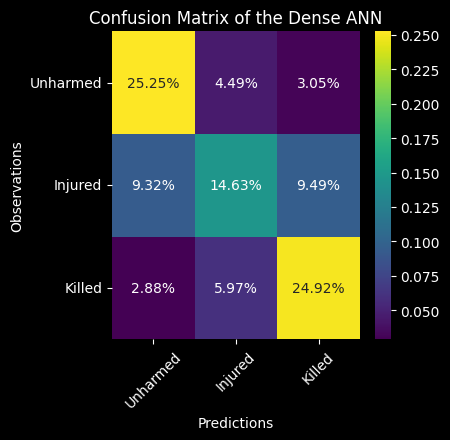

In [10]:
visualization.plot_confusion_matrix(
    y_true=y_test,
    y_pred=test_pred_class,
    model_name=models_df.loc[MODEL_ID, "model"].name.replace("_", " "),
)

## Ordinal Regression with Coral

In [11]:
MODEL_ID = "coral_ann"

NUM_CLASSES = 3
DROPOUT_RATE = 0.4

models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(128, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(32, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        coral.CoralOrdinal(num_classes=NUM_CLASSES),
    ],
    name="Coral_Ordinal_ANN",
)

models_df.loc[MODEL_ID, "model"].compile(
    loss=coral.OrdinalCrossEntropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

In [12]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 17:34 - loss: 1.6553 - accuracy: 0.4375 - mean_absolute_error_labels: 1.0312

 22/641 [>.............................] - ETA: 1s - loss: 1.4154 - accuracy: 0.3324 - mean_absolute_error_labels: 0.7798   

 41/641 [>.............................] - ETA: 1s - loss: 1.3188 - accuracy: 0.3361 - mean_absolute_error_labels: 0.6966

 60/641 [=>............................] - ETA: 1s - loss: 1.2610 - accuracy: 0.3448 - mean_absolute_error_labels: 0.6474

 79/641 [==>...........................] - ETA: 1s - loss: 1.2129 - accuracy: 0.3358 - mean_absolute_error_labels: 0.6195

 99/641 [===>..........................] - ETA: 1s - loss: 1.1734 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5941

120/641 [====>.........................] - ETA: 1s - loss: 1.1529 - accuracy: 0.3294 - mean_absolute_error_labels: 0.5794

142/641 [=====>........................] - ETA: 1s - loss: 1.1340 - accuracy: 0.3308 - mean_absolute_error_labels: 0.5706

162/641 [======>.......................] - ETA: 1s - loss: 1.1156 - accuracy: 0.3258 - mean_absolute_error_labels: 0.5569

182/641 [=======>......................] - ETA: 1s - loss: 1.1025 - accuracy: 0.3243 - mean_absolute_error_labels: 0.5491

202/641 [========>.....................] - ETA: 1s - loss: 1.0942 - accuracy: 0.3238 - mean_absolute_error_labels: 0.5452

220/641 [=========>....................] - ETA: 1s - loss: 1.0811 - accuracy: 0.3249 - mean_absolute_error_labels: 0.5385

241/641 [==========>...................] - ETA: 1s - loss: 1.0734 - accuracy: 0.3269 - mean_absolute_error_labels: 0.5328

262/641 [===========>..................] - ETA: 0s - loss: 1.0668 - accuracy: 0.3297 - mean_absolute_error_labels: 0.5267

282/641 [============>.................] - ETA: 0s - loss: 1.0645 - accuracy: 0.3292 - mean_absolute_error_labels: 0.5235

302/641 [=============>................] - ETA: 0s - loss: 1.0643 - accuracy: 0.3278 - mean_absolute_error_labels: 0.5255

323/641 [==============>...............] - ETA: 0s - loss: 1.0606 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5232

342/641 [===============>..............] - ETA: 0s - loss: 1.0564 - accuracy: 0.3301 - mean_absolute_error_labels: 0.5200

360/641 [===============>..............] - ETA: 0s - loss: 1.0520 - accuracy: 0.3289 - mean_absolute_error_labels: 0.5179

378/641 [================>.............] - ETA: 0s - loss: 1.0441 - accuracy: 0.3280 - mean_absolute_error_labels: 0.5112

397/641 [=================>............] - ETA: 0s - loss: 1.0421 - accuracy: 0.3297 - mean_absolute_error_labels: 0.5098

416/641 [==================>...........] - ETA: 0s - loss: 1.0401 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5088

435/641 [===================>..........] - ETA: 0s - loss: 1.0372 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5074

455/641 [====================>.........] - ETA: 0s - loss: 1.0335 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5052

475/641 [=====================>........] - ETA: 0s - loss: 1.0324 - accuracy: 0.3314 - mean_absolute_error_labels: 0.5046

496/641 [======================>.......] - ETA: 0s - loss: 1.0317 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5032

516/641 [=======================>......] - ETA: 0s - loss: 1.0305 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5011

536/641 [========================>.....] - ETA: 0s - loss: 1.0267 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4988

557/641 [=========================>....] - ETA: 0s - loss: 1.0257 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4978

577/641 [==========================>...] - ETA: 0s - loss: 1.0249 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4977

597/641 [==========================>...] - ETA: 0s - loss: 1.0244 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4963

616/641 [===========================>..] - ETA: 0s - loss: 1.0238 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4963

635/641 [============================>.] - ETA: 0s - loss: 1.0239 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4959

641/641 [==============================] - 4s 3ms/step - loss: 1.0234 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4955 - val_loss: 0.9539 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4679 - lr: 0.0100


Epoch 2/20


  1/641 [..............................] - ETA: 2s - loss: 1.0022 - accuracy: 0.5625 - mean_absolute_error_labels: 0.5938

 20/641 [..............................] - ETA: 1s - loss: 1.0034 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4984

 41/641 [>.............................] - ETA: 1s - loss: 1.0067 - accuracy: 0.3262 - mean_absolute_error_labels: 0.4947

 62/641 [=>............................] - ETA: 1s - loss: 0.9882 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4829

 82/641 [==>...........................] - ETA: 1s - loss: 0.9876 - accuracy: 0.3396 - mean_absolute_error_labels: 0.4768

 99/641 [===>..........................] - ETA: 1s - loss: 0.9928 - accuracy: 0.3425 - mean_absolute_error_labels: 0.4845

120/641 [====>.........................] - ETA: 1s - loss: 0.9859 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4799

140/641 [=====>........................] - ETA: 1s - loss: 0.9827 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4775

160/641 [======>.......................] - ETA: 1s - loss: 0.9756 - accuracy: 0.3416 - mean_absolute_error_labels: 0.4730

178/641 [=======>......................] - ETA: 1s - loss: 0.9817 - accuracy: 0.3406 - mean_absolute_error_labels: 0.4744

197/641 [========>.....................] - ETA: 1s - loss: 0.9791 - accuracy: 0.3391 - mean_absolute_error_labels: 0.4714

216/641 [=========>....................] - ETA: 1s - loss: 0.9826 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4711

236/641 [==========>...................] - ETA: 1s - loss: 0.9736 - accuracy: 0.3386 - mean_absolute_error_labels: 0.4666

256/641 [==========>...................] - ETA: 1s - loss: 0.9736 - accuracy: 0.3372 - mean_absolute_error_labels: 0.4645

276/641 [===========>..................] - ETA: 0s - loss: 0.9794 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4672

295/641 [============>.................] - ETA: 0s - loss: 0.9814 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4691

312/641 [=============>................] - ETA: 0s - loss: 0.9795 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4677

331/641 [==============>...............] - ETA: 0s - loss: 0.9815 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4685

351/641 [===============>..............] - ETA: 0s - loss: 0.9795 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4678

371/641 [================>.............] - ETA: 0s - loss: 0.9807 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4682

392/641 [=================>............] - ETA: 0s - loss: 0.9774 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4672

414/641 [==================>...........] - ETA: 0s - loss: 0.9786 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4678

434/641 [===================>..........] - ETA: 0s - loss: 0.9788 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4677

453/641 [====================>.........] - ETA: 0s - loss: 0.9797 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4690

473/641 [=====================>........] - ETA: 0s - loss: 0.9794 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4682

491/641 [=====================>........] - ETA: 0s - loss: 0.9790 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4677

511/641 [======================>.......] - ETA: 0s - loss: 0.9801 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4680

529/641 [=======================>......] - ETA: 0s - loss: 0.9810 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4688

549/641 [========================>.....] - ETA: 0s - loss: 0.9813 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4683

570/641 [=========================>....] - ETA: 0s - loss: 0.9831 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4702

591/641 [==========================>...] - ETA: 0s - loss: 0.9828 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4690

611/641 [===========================>..] - ETA: 0s - loss: 0.9810 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4673

630/641 [============================>.] - ETA: 0s - loss: 0.9813 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4675

641/641 [==============================] - 2s 3ms/step - loss: 0.9807 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4674 - val_loss: 0.9297 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4401 - lr: 0.0100


Epoch 3/20


  1/641 [..............................] - ETA: 2s - loss: 0.8666 - accuracy: 0.2500 - mean_absolute_error_labels: 0.3750

 20/641 [..............................] - ETA: 1s - loss: 1.0056 - accuracy: 0.3047 - mean_absolute_error_labels: 0.4703

 40/641 [>.............................] - ETA: 1s - loss: 0.9856 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4664

 60/641 [=>............................] - ETA: 1s - loss: 0.9612 - accuracy: 0.3396 - mean_absolute_error_labels: 0.4479

 80/641 [==>...........................] - ETA: 1s - loss: 0.9772 - accuracy: 0.3426 - mean_absolute_error_labels: 0.4621

100/641 [===>..........................] - ETA: 1s - loss: 0.9715 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4581

120/641 [====>.........................] - ETA: 1s - loss: 0.9714 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4544

141/641 [=====>........................] - ETA: 1s - loss: 0.9713 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4574

161/641 [======>.......................] - ETA: 1s - loss: 0.9741 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4618

180/641 [=======>......................] - ETA: 1s - loss: 0.9796 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4681

200/641 [========>.....................] - ETA: 1s - loss: 0.9788 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4694

218/641 [=========>....................] - ETA: 1s - loss: 0.9793 - accuracy: 0.3297 - mean_absolute_error_labels: 0.4703

237/641 [==========>...................] - ETA: 1s - loss: 0.9802 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4680

257/641 [===========>..................] - ETA: 1s - loss: 0.9760 - accuracy: 0.3313 - mean_absolute_error_labels: 0.4663

277/641 [===========>..................] - ETA: 0s - loss: 0.9795 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4684

297/641 [============>.................] - ETA: 0s - loss: 0.9807 - accuracy: 0.3315 - mean_absolute_error_labels: 0.4703

318/641 [=============>................] - ETA: 0s - loss: 0.9833 - accuracy: 0.3309 - mean_absolute_error_labels: 0.4686

337/641 [==============>...............] - ETA: 0s - loss: 0.9829 - accuracy: 0.3298 - mean_absolute_error_labels: 0.4697

357/641 [===============>..............] - ETA: 0s - loss: 0.9834 - accuracy: 0.3311 - mean_absolute_error_labels: 0.4688

377/641 [================>.............] - ETA: 0s - loss: 0.9849 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4700

394/641 [=================>............] - ETA: 0s - loss: 0.9836 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4688

410/641 [==================>...........] - ETA: 0s - loss: 0.9858 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4702

425/641 [==================>...........] - ETA: 0s - loss: 0.9874 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4701

441/641 [===================>..........] - ETA: 0s - loss: 0.9884 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4713

457/641 [====================>.........] - ETA: 0s - loss: 0.9879 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4703

473/641 [=====================>........] - ETA: 0s - loss: 0.9881 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4703

488/641 [=====================>........] - ETA: 0s - loss: 0.9886 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4707

507/641 [======================>.......] - ETA: 0s - loss: 0.9883 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4702

527/641 [=======================>......] - ETA: 0s - loss: 0.9887 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4697

545/641 [========================>.....] - ETA: 0s - loss: 0.9878 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4687

561/641 [=========================>....] - ETA: 0s - loss: 0.9885 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4694

578/641 [==========================>...] - ETA: 0s - loss: 0.9877 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4687

596/641 [==========================>...] - ETA: 0s - loss: 0.9869 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4685

617/641 [===========================>..] - ETA: 0s - loss: 0.9881 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4693

638/641 [============================>.] - ETA: 0s - loss: 0.9875 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4692

641/641 [==============================] - 2s 3ms/step - loss: 0.9873 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4690 - val_loss: 0.9403 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4627 - lr: 0.0100


Epoch 4/20


  1/641 [..............................] - ETA: 2s - loss: 1.0142 - accuracy: 0.3750 - mean_absolute_error_labels: 0.5938

 21/641 [..............................] - ETA: 1s - loss: 0.9441 - accuracy: 0.3185 - mean_absolute_error_labels: 0.4494

 41/641 [>.............................] - ETA: 1s - loss: 0.9769 - accuracy: 0.3293 - mean_absolute_error_labels: 0.4672

 60/641 [=>............................] - ETA: 1s - loss: 0.9636 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4635

 79/641 [==>...........................] - ETA: 1s - loss: 0.9626 - accuracy: 0.3283 - mean_absolute_error_labels: 0.4612

 98/641 [===>..........................] - ETA: 1s - loss: 0.9701 - accuracy: 0.3275 - mean_absolute_error_labels: 0.4621

118/641 [====>.........................] - ETA: 1s - loss: 0.9763 - accuracy: 0.3318 - mean_absolute_error_labels: 0.4674

138/641 [=====>........................] - ETA: 1s - loss: 0.9792 - accuracy: 0.3315 - mean_absolute_error_labels: 0.4694

158/641 [======>.......................] - ETA: 1s - loss: 0.9919 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4733

179/641 [=======>......................] - ETA: 1s - loss: 0.9916 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4724

200/641 [========>.....................] - ETA: 1s - loss: 0.9937 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4728

220/641 [=========>....................] - ETA: 1s - loss: 0.9915 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4726

241/641 [==========>...................] - ETA: 1s - loss: 0.9881 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4712

261/641 [===========>..................] - ETA: 0s - loss: 0.9876 - accuracy: 0.3313 - mean_absolute_error_labels: 0.4698

282/641 [============>.................] - ETA: 0s - loss: 0.9881 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4714

301/641 [=============>................] - ETA: 0s - loss: 0.9853 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4693

318/641 [=============>................] - ETA: 0s - loss: 0.9805 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4670

335/641 [==============>...............] - ETA: 0s - loss: 0.9786 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4656

352/641 [===============>..............] - ETA: 0s - loss: 0.9806 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4658

369/641 [================>.............] - ETA: 0s - loss: 0.9809 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4665

386/641 [=================>............] - ETA: 0s - loss: 0.9818 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4666

402/641 [=================>............] - ETA: 0s - loss: 0.9838 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4685

418/641 [==================>...........] - ETA: 0s - loss: 0.9836 - accuracy: 0.3367 - mean_absolute_error_labels: 0.4683

435/641 [===================>..........] - ETA: 0s - loss: 0.9844 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4685

450/641 [====================>.........] - ETA: 0s - loss: 0.9834 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4676

464/641 [====================>.........] - ETA: 0s - loss: 0.9826 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4671

477/641 [=====================>........] - ETA: 0s - loss: 0.9831 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4669

494/641 [======================>.......] - ETA: 0s - loss: 0.9823 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4659

510/641 [======================>.......] - ETA: 0s - loss: 0.9809 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4650

528/641 [=======================>......] - ETA: 0s - loss: 0.9785 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4638

543/641 [========================>.....] - ETA: 0s - loss: 0.9797 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4640

561/641 [=========================>....] - ETA: 0s - loss: 0.9815 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4646

577/641 [==========================>...] - ETA: 0s - loss: 0.9811 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4639

594/641 [==========================>...] - ETA: 0s - loss: 0.9797 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4631

610/641 [===========================>..] - ETA: 0s - loss: 0.9796 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4622

626/641 [============================>.] - ETA: 0s - loss: 0.9801 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4620

641/641 [==============================] - 2s 3ms/step - loss: 0.9811 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4618 - val_loss: 0.9138 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4353 - lr: 0.0100


Epoch 5/20


  1/641 [..............................] - ETA: 3s - loss: 1.0564 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5312

 20/641 [..............................] - ETA: 1s - loss: 0.9812 - accuracy: 0.3297 - mean_absolute_error_labels: 0.4594

 40/641 [>.............................] - ETA: 1s - loss: 0.9803 - accuracy: 0.3313 - mean_absolute_error_labels: 0.4594

 60/641 [=>............................] - ETA: 1s - loss: 0.9666 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4583

 77/641 [==>...........................] - ETA: 1s - loss: 0.9724 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4623

 94/641 [===>..........................] - ETA: 1s - loss: 0.9875 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4724

111/641 [====>.........................] - ETA: 1s - loss: 0.9843 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4688

128/641 [====>.........................] - ETA: 1s - loss: 0.9805 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4683

144/641 [=====>........................] - ETA: 1s - loss: 0.9780 - accuracy: 0.3403 - mean_absolute_error_labels: 0.4664

161/641 [======>.......................] - ETA: 1s - loss: 0.9720 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4616

176/641 [=======>......................] - ETA: 1s - loss: 0.9710 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4627

193/641 [========>.....................] - ETA: 1s - loss: 0.9748 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4634

209/641 [========>.....................] - ETA: 1s - loss: 0.9710 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4613

225/641 [=========>....................] - ETA: 1s - loss: 0.9715 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4618

239/641 [==========>...................] - ETA: 1s - loss: 0.9769 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4652

255/641 [==========>...................] - ETA: 1s - loss: 0.9721 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4631

270/641 [===========>..................] - ETA: 1s - loss: 0.9734 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4625

286/641 [============>.................] - ETA: 1s - loss: 0.9764 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4635

302/641 [=============>................] - ETA: 1s - loss: 0.9773 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4621

318/641 [=============>................] - ETA: 0s - loss: 0.9751 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4603

334/641 [==============>...............] - ETA: 0s - loss: 0.9811 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4620

350/641 [===============>..............] - ETA: 0s - loss: 0.9804 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4621

366/641 [================>.............] - ETA: 0s - loss: 0.9815 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4644

381/641 [================>.............] - ETA: 0s - loss: 0.9804 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4635

395/641 [=================>............] - ETA: 0s - loss: 0.9787 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4622

411/641 [==================>...........] - ETA: 0s - loss: 0.9787 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4630

428/641 [===================>..........] - ETA: 0s - loss: 0.9807 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4641

446/641 [===================>..........] - ETA: 0s - loss: 0.9820 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4638

466/641 [====================>.........] - ETA: 0s - loss: 0.9816 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4643

486/641 [=====================>........] - ETA: 0s - loss: 0.9802 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4637

507/641 [======================>.......] - ETA: 0s - loss: 0.9799 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4633

529/641 [=======================>......] - ETA: 0s - loss: 0.9801 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4630

549/641 [========================>.....] - ETA: 0s - loss: 0.9787 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4626

570/641 [=========================>....] - ETA: 0s - loss: 0.9790 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4622

588/641 [==========================>...] - ETA: 0s - loss: 0.9791 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4624

605/641 [===========================>..] - ETA: 0s - loss: 0.9804 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4620

623/641 [============================>.] - ETA: 0s - loss: 0.9811 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4623

641/641 [==============================] - ETA: 0s - loss: 0.9809 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4614

641/641 [==============================] - 2s 3ms/step - loss: 0.9809 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4614 - val_loss: 0.9215 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4449 - lr: 0.0100


Epoch 6/20


  1/641 [..............................] - ETA: 1s - loss: 0.8571 - accuracy: 0.2812 - mean_absolute_error_labels: 0.3438

 18/641 [..............................] - ETA: 1s - loss: 0.9755 - accuracy: 0.3229 - mean_absolute_error_labels: 0.4549

 37/641 [>.............................] - ETA: 1s - loss: 0.9485 - accuracy: 0.3302 - mean_absolute_error_labels: 0.4535

 57/641 [=>............................] - ETA: 1s - loss: 0.9536 - accuracy: 0.3191 - mean_absolute_error_labels: 0.4490

 78/641 [==>...........................] - ETA: 1s - loss: 0.9682 - accuracy: 0.3221 - mean_absolute_error_labels: 0.4551

 98/641 [===>..........................] - ETA: 1s - loss: 0.9555 - accuracy: 0.3214 - mean_absolute_error_labels: 0.4439

119/641 [====>.........................] - ETA: 1s - loss: 0.9633 - accuracy: 0.3235 - mean_absolute_error_labels: 0.4477

139/641 [=====>........................] - ETA: 1s - loss: 0.9634 - accuracy: 0.3219 - mean_absolute_error_labels: 0.4496

158/641 [======>.......................] - ETA: 1s - loss: 0.9629 - accuracy: 0.3236 - mean_absolute_error_labels: 0.4476

177/641 [=======>......................] - ETA: 1s - loss: 0.9613 - accuracy: 0.3266 - mean_absolute_error_labels: 0.4467

196/641 [========>.....................] - ETA: 1s - loss: 0.9631 - accuracy: 0.3253 - mean_absolute_error_labels: 0.4490

216/641 [=========>....................] - ETA: 1s - loss: 0.9660 - accuracy: 0.3262 - mean_absolute_error_labels: 0.4523

235/641 [=========>....................] - ETA: 1s - loss: 0.9692 - accuracy: 0.3274 - mean_absolute_error_labels: 0.4551

255/641 [==========>...................] - ETA: 1s - loss: 0.9662 - accuracy: 0.3275 - mean_absolute_error_labels: 0.4532

276/641 [===========>..................] - ETA: 0s - loss: 0.9665 - accuracy: 0.3264 - mean_absolute_error_labels: 0.4534

294/641 [============>.................] - ETA: 0s - loss: 0.9660 - accuracy: 0.3279 - mean_absolute_error_labels: 0.4540

313/641 [=============>................] - ETA: 0s - loss: 0.9635 - accuracy: 0.3284 - mean_absolute_error_labels: 0.4528

332/641 [==============>...............] - ETA: 0s - loss: 0.9639 - accuracy: 0.3293 - mean_absolute_error_labels: 0.4524

352/641 [===============>..............] - ETA: 0s - loss: 0.9678 - accuracy: 0.3306 - mean_absolute_error_labels: 0.4552

371/641 [================>.............] - ETA: 0s - loss: 0.9674 - accuracy: 0.3305 - mean_absolute_error_labels: 0.4548

392/641 [=================>............] - ETA: 0s - loss: 0.9674 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4548

411/641 [==================>...........] - ETA: 0s - loss: 0.9654 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4551

431/641 [===================>..........] - ETA: 0s - loss: 0.9659 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4558

452/641 [====================>.........] - ETA: 0s - loss: 0.9688 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4575

472/641 [=====================>........] - ETA: 0s - loss: 0.9674 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4571

493/641 [======================>.......] - ETA: 0s - loss: 0.9677 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4566

510/641 [======================>.......] - ETA: 0s - loss: 0.9651 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4549

527/641 [=======================>......] - ETA: 0s - loss: 0.9671 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4564

539/641 [========================>.....] - ETA: 0s - loss: 0.9689 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4569

553/641 [========================>.....] - ETA: 0s - loss: 0.9691 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4573

569/641 [=========================>....] - ETA: 0s - loss: 0.9692 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4571

586/641 [==========================>...] - ETA: 0s - loss: 0.9708 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4585

604/641 [===========================>..] - ETA: 0s - loss: 0.9703 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4584

622/641 [============================>.] - ETA: 0s - loss: 0.9704 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4587

641/641 [==============================] - ETA: 0s - loss: 0.9714 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4588

641/641 [==============================] - 2s 3ms/step - loss: 0.9714 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4588 - val_loss: 0.9930 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4978 - lr: 0.0100


Epoch 7/20


  1/641 [..............................] - ETA: 2s - loss: 1.0642 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5625

 20/641 [..............................] - ETA: 1s - loss: 0.9961 - accuracy: 0.3125 - mean_absolute_error_labels: 0.5000

 37/641 [>.............................] - ETA: 1s - loss: 0.9954 - accuracy: 0.3133 - mean_absolute_error_labels: 0.4916

 54/641 [=>............................] - ETA: 1s - loss: 0.9868 - accuracy: 0.3241 - mean_absolute_error_labels: 0.4780

 71/641 [==>...........................] - ETA: 1s - loss: 0.9975 - accuracy: 0.3292 - mean_absolute_error_labels: 0.4767

 88/641 [===>..........................] - ETA: 1s - loss: 1.0006 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4812

107/641 [====>.........................] - ETA: 1s - loss: 0.9948 - accuracy: 0.3303 - mean_absolute_error_labels: 0.4755

127/641 [====>.........................] - ETA: 1s - loss: 0.9855 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4702

148/641 [=====>........................] - ETA: 1s - loss: 0.9718 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4609

169/641 [======>.......................] - ETA: 1s - loss: 0.9670 - accuracy: 0.3364 - mean_absolute_error_labels: 0.4562

189/641 [=======>......................] - ETA: 1s - loss: 0.9647 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4542

210/641 [========>.....................] - ETA: 1s - loss: 0.9676 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4548

230/641 [=========>....................] - ETA: 1s - loss: 0.9697 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4533

248/641 [==========>...................] - ETA: 1s - loss: 0.9691 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4546

265/641 [===========>..................] - ETA: 1s - loss: 0.9678 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4520

281/641 [============>.................] - ETA: 0s - loss: 0.9695 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4543

298/641 [============>.................] - ETA: 0s - loss: 0.9688 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4526

315/641 [=============>................] - ETA: 0s - loss: 0.9677 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4516

336/641 [==============>...............] - ETA: 0s - loss: 0.9614 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4486

356/641 [===============>..............] - ETA: 0s - loss: 0.9622 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4489

375/641 [================>.............] - ETA: 0s - loss: 0.9619 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4492

392/641 [=================>............] - ETA: 0s - loss: 0.9655 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4511

405/641 [=================>............] - ETA: 0s - loss: 0.9674 - accuracy: 0.3319 - mean_absolute_error_labels: 0.4522

419/641 [==================>...........] - ETA: 0s - loss: 0.9664 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4520

434/641 [===================>..........] - ETA: 0s - loss: 0.9656 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4515

450/641 [====================>.........] - ETA: 0s - loss: 0.9658 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4511

467/641 [====================>.........] - ETA: 0s - loss: 0.9663 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4510

484/641 [=====================>........] - ETA: 0s - loss: 0.9662 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4506

500/641 [======================>.......] - ETA: 0s - loss: 0.9642 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4494

516/641 [=======================>......] - ETA: 0s - loss: 0.9668 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4505

532/641 [=======================>......] - ETA: 0s - loss: 0.9691 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4520

547/641 [========================>.....] - ETA: 0s - loss: 0.9707 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4529

562/641 [=========================>....] - ETA: 0s - loss: 0.9715 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4526

580/641 [==========================>...] - ETA: 0s - loss: 0.9741 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4548

600/641 [===========================>..] - ETA: 0s - loss: 0.9755 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4547

620/641 [============================>.] - ETA: 0s - loss: 0.9760 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4554

641/641 [==============================] - ETA: 0s - loss: 0.9752 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4546

641/641 [==============================] - 2s 3ms/step - loss: 0.9752 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4546 - val_loss: 0.9646 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4549 - lr: 0.0100


Epoch 8/20


  1/641 [..............................] - ETA: 2s - loss: 1.0285 - accuracy: 0.2812 - mean_absolute_error_labels: 0.3438

 21/641 [..............................] - ETA: 1s - loss: 0.9560 - accuracy: 0.3557 - mean_absolute_error_labels: 0.4211

 40/641 [>.............................] - ETA: 1s - loss: 0.9666 - accuracy: 0.3406 - mean_absolute_error_labels: 0.4469

 60/641 [=>............................] - ETA: 1s - loss: 0.9614 - accuracy: 0.3464 - mean_absolute_error_labels: 0.4391

 79/641 [==>...........................] - ETA: 1s - loss: 0.9637 - accuracy: 0.3390 - mean_absolute_error_labels: 0.4454

 94/641 [===>..........................] - ETA: 1s - loss: 0.9625 - accuracy: 0.3411 - mean_absolute_error_labels: 0.4428

110/641 [====>.........................] - ETA: 1s - loss: 0.9648 - accuracy: 0.3443 - mean_absolute_error_labels: 0.4443

123/641 [====>.........................] - ETA: 1s - loss: 0.9731 - accuracy: 0.3420 - mean_absolute_error_labels: 0.4479

132/641 [=====>........................] - ETA: 1s - loss: 0.9698 - accuracy: 0.3409 - mean_absolute_error_labels: 0.4472

144/641 [=====>........................] - ETA: 1s - loss: 0.9687 - accuracy: 0.3414 - mean_absolute_error_labels: 0.4453

155/641 [======>.......................] - ETA: 1s - loss: 0.9651 - accuracy: 0.3409 - mean_absolute_error_labels: 0.4415

173/641 [=======>......................] - ETA: 1s - loss: 0.9681 - accuracy: 0.3385 - mean_absolute_error_labels: 0.4440

192/641 [=======>......................] - ETA: 1s - loss: 0.9702 - accuracy: 0.3377 - mean_absolute_error_labels: 0.4450

210/641 [========>.....................] - ETA: 1s - loss: 0.9688 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4448

225/641 [=========>....................] - ETA: 1s - loss: 0.9721 - accuracy: 0.3369 - mean_absolute_error_labels: 0.4450

241/641 [==========>...................] - ETA: 1s - loss: 0.9709 - accuracy: 0.3369 - mean_absolute_error_labels: 0.4455

256/641 [==========>...................] - ETA: 1s - loss: 0.9742 - accuracy: 0.3383 - mean_absolute_error_labels: 0.4471

273/641 [===========>..................] - ETA: 1s - loss: 0.9726 - accuracy: 0.3379 - mean_absolute_error_labels: 0.4473

288/641 [============>.................] - ETA: 1s - loss: 0.9762 - accuracy: 0.3372 - mean_absolute_error_labels: 0.4500

303/641 [=============>................] - ETA: 1s - loss: 0.9764 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4497

319/641 [=============>................] - ETA: 1s - loss: 0.9778 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4513

336/641 [==============>...............] - ETA: 0s - loss: 0.9774 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4524

357/641 [===============>..............] - ETA: 0s - loss: 0.9832 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4556

378/641 [================>.............] - ETA: 0s - loss: 0.9838 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4562

399/641 [=================>............] - ETA: 0s - loss: 0.9865 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4564

418/641 [==================>...........] - ETA: 0s - loss: 0.9850 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4563

438/641 [===================>..........] - ETA: 0s - loss: 0.9825 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4554

456/641 [====================>.........] - ETA: 0s - loss: 0.9838 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4566

475/641 [=====================>........] - ETA: 0s - loss: 0.9839 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4570

495/641 [======================>.......] - ETA: 0s - loss: 0.9849 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4583

515/641 [=======================>......] - ETA: 0s - loss: 0.9846 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4582

536/641 [========================>.....] - ETA: 0s - loss: 0.9838 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4580

556/641 [=========================>....] - ETA: 0s - loss: 0.9843 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4589

577/641 [==========================>...] - ETA: 0s - loss: 0.9838 - accuracy: 0.3360 - mean_absolute_error_labels: 0.4598

596/641 [==========================>...] - ETA: 0s - loss: 0.9829 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4590

615/641 [===========================>..] - ETA: 0s - loss: 0.9824 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4599

634/641 [============================>.] - ETA: 0s - loss: 0.9811 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4588

641/641 [==============================] - 2s 3ms/step - loss: 0.9813 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4590 - val_loss: 0.9379 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4492 - lr: 0.0100


Epoch 9/20


  1/641 [..............................] - ETA: 3s - loss: 1.0310 - accuracy: 0.2812 - mean_absolute_error_labels: 0.4062

 18/641 [..............................] - ETA: 1s - loss: 0.9823 - accuracy: 0.3472 - mean_absolute_error_labels: 0.4688

 35/641 [>.............................] - ETA: 1s - loss: 1.0119 - accuracy: 0.3268 - mean_absolute_error_labels: 0.4857

 51/641 [=>............................] - ETA: 1s - loss: 0.9962 - accuracy: 0.3364 - mean_absolute_error_labels: 0.4773

 69/641 [==>...........................] - ETA: 1s - loss: 0.9874 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4760

 88/641 [===>..........................] - ETA: 1s - loss: 0.9875 - accuracy: 0.3391 - mean_absolute_error_labels: 0.4684

106/641 [===>..........................] - ETA: 1s - loss: 0.9858 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4708

125/641 [====>.........................] - ETA: 1s - loss: 0.9838 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4675

146/641 [=====>........................] - ETA: 1s - loss: 0.9769 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4606

167/641 [======>.......................] - ETA: 1s - loss: 0.9837 - accuracy: 0.3303 - mean_absolute_error_labels: 0.4663

188/641 [=======>......................] - ETA: 1s - loss: 0.9808 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4629

209/641 [========>.....................] - ETA: 1s - loss: 0.9788 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4617

229/641 [=========>....................] - ETA: 1s - loss: 0.9803 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4625

249/641 [==========>...................] - ETA: 1s - loss: 0.9780 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4623

266/641 [===========>..................] - ETA: 1s - loss: 0.9741 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4578

284/641 [============>.................] - ETA: 0s - loss: 0.9694 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4549

303/641 [=============>................] - ETA: 0s - loss: 0.9727 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4571

319/641 [=============>................] - ETA: 0s - loss: 0.9686 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4555

336/641 [==============>...............] - ETA: 0s - loss: 0.9695 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4555

353/641 [===============>..............] - ETA: 0s - loss: 0.9714 - accuracy: 0.3316 - mean_absolute_error_labels: 0.4559

373/641 [================>.............] - ETA: 0s - loss: 0.9707 - accuracy: 0.3316 - mean_absolute_error_labels: 0.4559

395/641 [=================>............] - ETA: 0s - loss: 0.9706 - accuracy: 0.3305 - mean_absolute_error_labels: 0.4554

416/641 [==================>...........] - ETA: 0s - loss: 0.9720 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4570

436/641 [===================>..........] - ETA: 0s - loss: 0.9727 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4574

456/641 [====================>.........] - ETA: 0s - loss: 0.9745 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4591

477/641 [=====================>........] - ETA: 0s - loss: 0.9752 - accuracy: 0.3312 - mean_absolute_error_labels: 0.4579

496/641 [======================>.......] - ETA: 0s - loss: 0.9754 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4589

517/641 [=======================>......] - ETA: 0s - loss: 0.9749 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4583

535/641 [========================>.....] - ETA: 0s - loss: 0.9748 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4586

554/641 [========================>.....] - ETA: 0s - loss: 0.9757 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4595

574/641 [=========================>....] - ETA: 0s - loss: 0.9754 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4587

588/641 [==========================>...] - ETA: 0s - loss: 0.9748 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4584

602/641 [===========================>..] - ETA: 0s - loss: 0.9767 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4587

616/641 [===========================>..] - ETA: 0s - loss: 0.9764 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4590

629/641 [============================>.] - ETA: 0s - loss: 0.9763 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4593

641/641 [==============================] - 2s 3ms/step - loss: 0.9751 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4588 - val_loss: 0.9413 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4431 - lr: 0.0100


Epoch 10/20


  1/641 [..............................] - ETA: 2s - loss: 0.6785 - accuracy: 0.3125 - mean_absolute_error_labels: 0.3125

 20/641 [..............................] - ETA: 1s - loss: 0.9706 - accuracy: 0.3203 - mean_absolute_error_labels: 0.4516

 40/641 [>.............................] - ETA: 1s - loss: 0.9761 - accuracy: 0.3195 - mean_absolute_error_labels: 0.4523

 59/641 [=>............................] - ETA: 1s - loss: 0.9684 - accuracy: 0.3215 - mean_absolute_error_labels: 0.4597

 79/641 [==>...........................] - ETA: 1s - loss: 0.9765 - accuracy: 0.3121 - mean_absolute_error_labels: 0.4652

 98/641 [===>..........................] - ETA: 1s - loss: 0.9746 - accuracy: 0.3173 - mean_absolute_error_labels: 0.4550

116/641 [====>.........................] - ETA: 1s - loss: 0.9780 - accuracy: 0.3128 - mean_absolute_error_labels: 0.4531

134/641 [=====>........................] - ETA: 1s - loss: 0.9799 - accuracy: 0.3167 - mean_absolute_error_labels: 0.4557

147/641 [=====>........................] - ETA: 1s - loss: 0.9809 - accuracy: 0.3223 - mean_absolute_error_labels: 0.4543

161/641 [======>.......................] - ETA: 1s - loss: 0.9814 - accuracy: 0.3245 - mean_absolute_error_labels: 0.4528

177/641 [=======>......................] - ETA: 1s - loss: 0.9808 - accuracy: 0.3250 - mean_absolute_error_labels: 0.4529

192/641 [=======>......................] - ETA: 1s - loss: 0.9791 - accuracy: 0.3236 - mean_absolute_error_labels: 0.4478

207/641 [========>.....................] - ETA: 1s - loss: 0.9803 - accuracy: 0.3250 - mean_absolute_error_labels: 0.4517

222/641 [=========>....................] - ETA: 1s - loss: 0.9802 - accuracy: 0.3259 - mean_absolute_error_labels: 0.4534

241/641 [==========>...................] - ETA: 1s - loss: 0.9832 - accuracy: 0.3297 - mean_absolute_error_labels: 0.4562

260/641 [===========>..................] - ETA: 1s - loss: 0.9806 - accuracy: 0.3309 - mean_absolute_error_labels: 0.4552

279/641 [============>.................] - ETA: 1s - loss: 0.9818 - accuracy: 0.3300 - mean_absolute_error_labels: 0.4549

298/641 [============>.................] - ETA: 1s - loss: 0.9838 - accuracy: 0.3305 - mean_absolute_error_labels: 0.4557

318/641 [=============>................] - ETA: 0s - loss: 0.9836 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4570

337/641 [==============>...............] - ETA: 0s - loss: 0.9851 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4586

358/641 [===============>..............] - ETA: 0s - loss: 0.9810 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4568

377/641 [================>.............] - ETA: 0s - loss: 0.9806 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4569

397/641 [=================>............] - ETA: 0s - loss: 0.9807 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4562

413/641 [==================>...........] - ETA: 0s - loss: 0.9806 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4565

428/641 [===================>..........] - ETA: 0s - loss: 0.9798 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4556

443/641 [===================>..........] - ETA: 0s - loss: 0.9809 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4557

460/641 [====================>.........] - ETA: 0s - loss: 0.9799 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4554

476/641 [=====================>........] - ETA: 0s - loss: 0.9814 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4570

493/641 [======================>.......] - ETA: 0s - loss: 0.9833 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4590

511/641 [======================>.......] - ETA: 0s - loss: 0.9812 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4579

527/641 [=======================>......] - ETA: 0s - loss: 0.9809 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4572

545/641 [========================>.....] - ETA: 0s - loss: 0.9793 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4563

566/641 [=========================>....] - ETA: 0s - loss: 0.9776 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4552

586/641 [==========================>...] - ETA: 0s - loss: 0.9766 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4546

607/641 [===========================>..] - ETA: 0s - loss: 0.9759 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4542

629/641 [============================>.] - ETA: 0s - loss: 0.9742 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4531

641/641 [==============================] - 2s 3ms/step - loss: 0.9749 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4531 - val_loss: 0.9303 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4566 - lr: 0.0100


Epoch 11/20


  1/641 [..............................] - ETA: 2s - loss: 1.2923 - accuracy: 0.2188 - mean_absolute_error_labels: 0.5625

 21/641 [..............................] - ETA: 1s - loss: 0.8931 - accuracy: 0.3274 - mean_absolute_error_labels: 0.4003

 41/641 [>.............................] - ETA: 1s - loss: 0.9298 - accuracy: 0.3255 - mean_absolute_error_labels: 0.4245

 61/641 [=>............................] - ETA: 1s - loss: 0.9241 - accuracy: 0.3309 - mean_absolute_error_labels: 0.4216

 82/641 [==>...........................] - ETA: 1s - loss: 0.9328 - accuracy: 0.3380 - mean_absolute_error_labels: 0.4345

103/641 [===>..........................] - ETA: 1s - loss: 0.9324 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4339

124/641 [====>.........................] - ETA: 1s - loss: 0.9448 - accuracy: 0.3299 - mean_absolute_error_labels: 0.4390

142/641 [=====>........................] - ETA: 1s - loss: 0.9476 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4360

162/641 [======>.......................] - ETA: 1s - loss: 0.9482 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4375

183/641 [=======>......................] - ETA: 1s - loss: 0.9452 - accuracy: 0.3318 - mean_absolute_error_labels: 0.4355

203/641 [========>.....................] - ETA: 1s - loss: 0.9443 - accuracy: 0.3316 - mean_absolute_error_labels: 0.4360

224/641 [=========>....................] - ETA: 1s - loss: 0.9454 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4386

244/641 [==========>...................] - ETA: 1s - loss: 0.9430 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4361

265/641 [===========>..................] - ETA: 0s - loss: 0.9430 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4370

286/641 [============>.................] - ETA: 0s - loss: 0.9427 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4368

306/641 [=============>................] - ETA: 0s - loss: 0.9421 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4378

325/641 [==============>...............] - ETA: 0s - loss: 0.9427 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4392

344/641 [===============>..............] - ETA: 0s - loss: 0.9392 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4371

362/641 [===============>..............] - ETA: 0s - loss: 0.9391 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4362

374/641 [================>.............] - ETA: 0s - loss: 0.9392 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4367

392/641 [=================>............] - ETA: 0s - loss: 0.9418 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4360

412/641 [==================>...........] - ETA: 0s - loss: 0.9441 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4377

433/641 [===================>..........] - ETA: 0s - loss: 0.9423 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4376

454/641 [====================>.........] - ETA: 0s - loss: 0.9446 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4394

475/641 [=====================>........] - ETA: 0s - loss: 0.9465 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4411

495/641 [======================>.......] - ETA: 0s - loss: 0.9470 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4409

513/641 [=======================>......] - ETA: 0s - loss: 0.9472 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4412

527/641 [=======================>......] - ETA: 0s - loss: 0.9475 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4405

544/641 [========================>.....] - ETA: 0s - loss: 0.9470 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4408

563/641 [=========================>....] - ETA: 0s - loss: 0.9456 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4393

583/641 [==========================>...] - ETA: 0s - loss: 0.9440 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4389

604/641 [===========================>..] - ETA: 0s - loss: 0.9428 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4378

625/641 [============================>.] - ETA: 0s - loss: 0.9447 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4394

641/641 [==============================] - 2s 3ms/step - loss: 0.9465 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4406 - val_loss: 0.9802 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5043 - lr: 0.0075


Epoch 12/20


  1/641 [..............................] - ETA: 3s - loss: 1.2932 - accuracy: 0.2500 - mean_absolute_error_labels: 0.7188

 16/641 [..............................] - ETA: 2s - loss: 0.9359 - accuracy: 0.3223 - mean_absolute_error_labels: 0.4551

 30/641 [>.............................] - ETA: 2s - loss: 0.9449 - accuracy: 0.3250 - mean_absolute_error_labels: 0.4594

 46/641 [=>............................] - ETA: 1s - loss: 0.9339 - accuracy: 0.3390 - mean_absolute_error_labels: 0.4484

 66/641 [==>...........................] - ETA: 1s - loss: 0.9322 - accuracy: 0.3277 - mean_absolute_error_labels: 0.4422

 85/641 [==>...........................] - ETA: 1s - loss: 0.9326 - accuracy: 0.3276 - mean_absolute_error_labels: 0.4364

102/641 [===>..........................] - ETA: 1s - loss: 0.9284 - accuracy: 0.3260 - mean_absolute_error_labels: 0.4384

119/641 [====>.........................] - ETA: 1s - loss: 0.9306 - accuracy: 0.3319 - mean_absolute_error_labels: 0.4378

136/641 [=====>........................] - ETA: 1s - loss: 0.9332 - accuracy: 0.3311 - mean_absolute_error_labels: 0.4389

152/641 [======>.......................] - ETA: 1s - loss: 0.9313 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4367

169/641 [======>.......................] - ETA: 1s - loss: 0.9324 - accuracy: 0.3295 - mean_absolute_error_labels: 0.4369

186/641 [=======>......................] - ETA: 1s - loss: 0.9378 - accuracy: 0.3295 - mean_absolute_error_labels: 0.4419

196/641 [========>.....................] - ETA: 1s - loss: 0.9398 - accuracy: 0.3276 - mean_absolute_error_labels: 0.4421

204/641 [========>.....................] - ETA: 1s - loss: 0.9348 - accuracy: 0.3284 - mean_absolute_error_labels: 0.4389

222/641 [=========>....................] - ETA: 1s - loss: 0.9333 - accuracy: 0.3297 - mean_absolute_error_labels: 0.4371

241/641 [==========>...................] - ETA: 1s - loss: 0.9320 - accuracy: 0.3299 - mean_absolute_error_labels: 0.4354

262/641 [===========>..................] - ETA: 1s - loss: 0.9275 - accuracy: 0.3311 - mean_absolute_error_labels: 0.4332

279/641 [============>.................] - ETA: 1s - loss: 0.9299 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4337

295/641 [============>.................] - ETA: 1s - loss: 0.9323 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4355

313/641 [=============>................] - ETA: 1s - loss: 0.9369 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4360

332/641 [==============>...............] - ETA: 0s - loss: 0.9396 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4368

352/641 [===============>..............] - ETA: 0s - loss: 0.9382 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4373

372/641 [================>.............] - ETA: 0s - loss: 0.9349 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4344

392/641 [=================>............] - ETA: 0s - loss: 0.9341 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4330

411/641 [==================>...........] - ETA: 0s - loss: 0.9332 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4332

430/641 [===================>..........] - ETA: 0s - loss: 0.9339 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4334

450/641 [====================>.........] - ETA: 0s - loss: 0.9326 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4327

470/641 [====================>.........] - ETA: 0s - loss: 0.9328 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4328

486/641 [=====================>........] - ETA: 0s - loss: 0.9334 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4333

504/641 [======================>.......] - ETA: 0s - loss: 0.9329 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4330

524/641 [=======================>......] - ETA: 0s - loss: 0.9325 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4327

545/641 [========================>.....] - ETA: 0s - loss: 0.9334 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4334

563/641 [=========================>....] - ETA: 0s - loss: 0.9335 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4331

573/641 [=========================>....] - ETA: 0s - loss: 0.9340 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4337

580/641 [==========================>...] - ETA: 0s - loss: 0.9337 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4337

588/641 [==========================>...] - ETA: 0s - loss: 0.9335 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4340

598/641 [==========================>...] - ETA: 0s - loss: 0.9326 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4335

610/641 [===========================>..] - ETA: 0s - loss: 0.9338 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4340

620/641 [============================>.] - ETA: 0s - loss: 0.9341 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4347

633/641 [============================>.] - ETA: 0s - loss: 0.9346 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4337

641/641 [==============================] - 2s 4ms/step - loss: 0.9338 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4336 - val_loss: 0.9335 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4596 - lr: 0.0075


Epoch 13/20


  1/641 [..............................] - ETA: 3s - loss: 0.9787 - accuracy: 0.2500 - mean_absolute_error_labels: 0.4062

 18/641 [..............................] - ETA: 1s - loss: 0.8878 - accuracy: 0.3160 - mean_absolute_error_labels: 0.3993

 35/641 [>.............................] - ETA: 1s - loss: 0.9262 - accuracy: 0.3241 - mean_absolute_error_labels: 0.4205

 51/641 [=>............................] - ETA: 1s - loss: 0.9361 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4320

 66/641 [==>...........................] - ETA: 1s - loss: 0.9260 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4337

 82/641 [==>...........................] - ETA: 1s - loss: 0.9257 - accuracy: 0.3403 - mean_absolute_error_labels: 0.4303

 99/641 [===>..........................] - ETA: 1s - loss: 0.9185 - accuracy: 0.3381 - mean_absolute_error_labels: 0.4265

116/641 [====>.........................] - ETA: 1s - loss: 0.9210 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4275

130/641 [=====>........................] - ETA: 1s - loss: 0.9252 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4310

140/641 [=====>........................] - ETA: 1s - loss: 0.9253 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4324

151/641 [======>.......................] - ETA: 1s - loss: 0.9215 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4317

160/641 [======>.......................] - ETA: 1s - loss: 0.9228 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4309

173/641 [=======>......................] - ETA: 1s - loss: 0.9219 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4317

186/641 [=======>......................] - ETA: 1s - loss: 0.9234 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4313

201/641 [========>.....................] - ETA: 1s - loss: 0.9265 - accuracy: 0.3388 - mean_absolute_error_labels: 0.4342

220/641 [=========>....................] - ETA: 1s - loss: 0.9283 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4328

240/641 [==========>...................] - ETA: 1s - loss: 0.9263 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4322

245/641 [==========>...................] - ETA: 1s - loss: 0.9243 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4301

255/641 [==========>...................] - ETA: 1s - loss: 0.9219 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4276

267/641 [===========>..................] - ETA: 1s - loss: 0.9210 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4286

277/641 [===========>..................] - ETA: 1s - loss: 0.9230 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4294

288/641 [============>.................] - ETA: 1s - loss: 0.9255 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4295

300/641 [=============>................] - ETA: 1s - loss: 0.9256 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4292

311/641 [=============>................] - ETA: 1s - loss: 0.9250 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4288

325/641 [==============>...............] - ETA: 1s - loss: 0.9195 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4257

342/641 [===============>..............] - ETA: 1s - loss: 0.9210 - accuracy: 0.3367 - mean_absolute_error_labels: 0.4248

361/641 [===============>..............] - ETA: 1s - loss: 0.9245 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4275

378/641 [================>.............] - ETA: 0s - loss: 0.9264 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4271

393/641 [=================>............] - ETA: 0s - loss: 0.9273 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4284

403/641 [=================>............] - ETA: 0s - loss: 0.9263 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4273

419/641 [==================>...........] - ETA: 0s - loss: 0.9282 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4294

439/641 [===================>..........] - ETA: 0s - loss: 0.9279 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4282

456/641 [====================>.........] - ETA: 0s - loss: 0.9283 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4282

469/641 [====================>.........] - ETA: 0s - loss: 0.9291 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4290

481/641 [=====================>........] - ETA: 0s - loss: 0.9278 - accuracy: 0.3360 - mean_absolute_error_labels: 0.4280

494/641 [======================>.......] - ETA: 0s - loss: 0.9262 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4266

506/641 [======================>.......] - ETA: 0s - loss: 0.9276 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4286

518/641 [=======================>......] - ETA: 0s - loss: 0.9278 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4289

530/641 [=======================>......] - ETA: 0s - loss: 0.9288 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4297

542/641 [========================>.....] - ETA: 0s - loss: 0.9296 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4305

555/641 [========================>.....] - ETA: 0s - loss: 0.9292 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4309

570/641 [=========================>....] - ETA: 0s - loss: 0.9283 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4306

590/641 [==========================>...] - ETA: 0s - loss: 0.9295 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4319

610/641 [===========================>..] - ETA: 0s - loss: 0.9298 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4320

630/641 [============================>.] - ETA: 0s - loss: 0.9296 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4316

641/641 [==============================] - 2s 4ms/step - loss: 0.9288 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4309 - val_loss: 0.9222 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4431 - lr: 0.0075


Epoch 14/20


  1/641 [..............................] - ETA: 1s - loss: 0.9068 - accuracy: 0.2188 - mean_absolute_error_labels: 0.5312

 21/641 [..............................] - ETA: 1s - loss: 0.9132 - accuracy: 0.3408 - mean_absolute_error_labels: 0.4315

 40/641 [>.............................] - ETA: 1s - loss: 0.8972 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4211

 60/641 [=>............................] - ETA: 1s - loss: 0.8977 - accuracy: 0.3292 - mean_absolute_error_labels: 0.4187

 81/641 [==>...........................] - ETA: 1s - loss: 0.9013 - accuracy: 0.3306 - mean_absolute_error_labels: 0.4252

102/641 [===>..........................] - ETA: 1s - loss: 0.9101 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4283

125/641 [====>.........................] - ETA: 1s - loss: 0.9132 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4232

147/641 [=====>........................] - ETA: 1s - loss: 0.9161 - accuracy: 0.3410 - mean_absolute_error_labels: 0.4252

169/641 [======>.......................] - ETA: 1s - loss: 0.9171 - accuracy: 0.3399 - mean_absolute_error_labels: 0.4255

189/641 [=======>......................] - ETA: 1s - loss: 0.9131 - accuracy: 0.3411 - mean_absolute_error_labels: 0.4223

209/641 [========>.....................] - ETA: 1s - loss: 0.9088 - accuracy: 0.3400 - mean_absolute_error_labels: 0.4205

232/641 [=========>....................] - ETA: 0s - loss: 0.9114 - accuracy: 0.3401 - mean_absolute_error_labels: 0.4208

255/641 [==========>...................] - ETA: 0s - loss: 0.9143 - accuracy: 0.3385 - mean_absolute_error_labels: 0.4205

276/641 [===========>..................] - ETA: 0s - loss: 0.9186 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4232

297/641 [============>.................] - ETA: 0s - loss: 0.9166 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4216

319/641 [=============>................] - ETA: 0s - loss: 0.9169 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4222

341/641 [==============>...............] - ETA: 0s - loss: 0.9159 - accuracy: 0.3372 - mean_absolute_error_labels: 0.4216

363/641 [===============>..............] - ETA: 0s - loss: 0.9158 - accuracy: 0.3369 - mean_absolute_error_labels: 0.4236

385/641 [=================>............] - ETA: 0s - loss: 0.9166 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4244

406/641 [==================>...........] - ETA: 0s - loss: 0.9178 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4250

426/641 [==================>...........] - ETA: 0s - loss: 0.9180 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4263

449/641 [====================>.........] - ETA: 0s - loss: 0.9194 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4269

472/641 [=====================>........] - ETA: 0s - loss: 0.9208 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4267

495/641 [======================>.......] - ETA: 0s - loss: 0.9245 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4290

517/641 [=======================>......] - ETA: 0s - loss: 0.9267 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4310

539/641 [========================>.....] - ETA: 0s - loss: 0.9282 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4326

560/641 [=========================>....] - ETA: 0s - loss: 0.9288 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4325

582/641 [==========================>...] - ETA: 0s - loss: 0.9290 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4326

603/641 [===========================>..] - ETA: 0s - loss: 0.9293 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4324

623/641 [============================>.] - ETA: 0s - loss: 0.9296 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4330

641/641 [==============================] - 2s 3ms/step - loss: 0.9281 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4322 - val_loss: 0.9009 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4206 - lr: 0.0075


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 0.6493 - accuracy: 0.4375 - mean_absolute_error_labels: 0.2812

 20/641 [..............................] - ETA: 1s - loss: 0.9144 - accuracy: 0.3562 - mean_absolute_error_labels: 0.4297

 42/641 [>.............................] - ETA: 1s - loss: 0.9417 - accuracy: 0.3438 - mean_absolute_error_labels: 0.4375

 64/641 [=>............................] - ETA: 1s - loss: 0.9265 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4263

 86/641 [===>..........................] - ETA: 1s - loss: 0.9317 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4259

109/641 [====>.........................] - ETA: 1s - loss: 0.9285 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4292

131/641 [=====>........................] - ETA: 1s - loss: 0.9306 - accuracy: 0.3390 - mean_absolute_error_labels: 0.4292

152/641 [======>.......................] - ETA: 1s - loss: 0.9275 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4268

172/641 [=======>......................] - ETA: 1s - loss: 0.9252 - accuracy: 0.3396 - mean_absolute_error_labels: 0.4246

192/641 [=======>......................] - ETA: 1s - loss: 0.9190 - accuracy: 0.3413 - mean_absolute_error_labels: 0.4217

211/641 [========>.....................] - ETA: 1s - loss: 0.9123 - accuracy: 0.3400 - mean_absolute_error_labels: 0.4191

231/641 [=========>....................] - ETA: 1s - loss: 0.9079 - accuracy: 0.3412 - mean_absolute_error_labels: 0.4164

253/641 [==========>...................] - ETA: 0s - loss: 0.9133 - accuracy: 0.3394 - mean_absolute_error_labels: 0.4177

276/641 [===========>..................] - ETA: 0s - loss: 0.9157 - accuracy: 0.3380 - mean_absolute_error_labels: 0.4209

297/641 [============>.................] - ETA: 0s - loss: 0.9197 - accuracy: 0.3385 - mean_absolute_error_labels: 0.4237

319/641 [=============>................] - ETA: 0s - loss: 0.9175 - accuracy: 0.3392 - mean_absolute_error_labels: 0.4230

340/641 [==============>...............] - ETA: 0s - loss: 0.9158 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4226

362/641 [===============>..............] - ETA: 0s - loss: 0.9116 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4203

385/641 [=================>............] - ETA: 0s - loss: 0.9149 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4216

406/641 [==================>...........] - ETA: 0s - loss: 0.9151 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4214

420/641 [==================>...........] - ETA: 0s - loss: 0.9158 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4230

435/641 [===================>..........] - ETA: 0s - loss: 0.9172 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4239

452/641 [====================>.........] - ETA: 0s - loss: 0.9153 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4228

469/641 [====================>.........] - ETA: 0s - loss: 0.9162 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4234

488/641 [=====================>........] - ETA: 0s - loss: 0.9144 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4225

506/641 [======================>.......] - ETA: 0s - loss: 0.9150 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4225

521/641 [=======================>......] - ETA: 0s - loss: 0.9142 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4220

536/641 [========================>.....] - ETA: 0s - loss: 0.9148 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4219

553/641 [========================>.....] - ETA: 0s - loss: 0.9168 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4229

568/641 [=========================>....] - ETA: 0s - loss: 0.9160 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4223

582/641 [==========================>...] - ETA: 0s - loss: 0.9175 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4231

595/641 [==========================>...] - ETA: 0s - loss: 0.9170 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4230

610/641 [===========================>..] - ETA: 0s - loss: 0.9176 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4234

626/641 [============================>.] - ETA: 0s - loss: 0.9184 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4244

641/641 [==============================] - 2s 3ms/step - loss: 0.9183 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4244 - val_loss: 0.9098 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4332 - lr: 0.0075


Epoch 16/20


  1/641 [..............................] - ETA: 1s - loss: 1.1451 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5312

 18/641 [..............................] - ETA: 1s - loss: 0.9007 - accuracy: 0.3125 - mean_absolute_error_labels: 0.4236

 37/641 [>.............................] - ETA: 1s - loss: 0.9032 - accuracy: 0.3184 - mean_absolute_error_labels: 0.4105

 56/641 [=>............................] - ETA: 1s - loss: 0.8961 - accuracy: 0.3186 - mean_absolute_error_labels: 0.4001

 76/641 [==>...........................] - ETA: 1s - loss: 0.8943 - accuracy: 0.3244 - mean_absolute_error_labels: 0.3956

 95/641 [===>..........................] - ETA: 1s - loss: 0.8953 - accuracy: 0.3326 - mean_absolute_error_labels: 0.3984

115/641 [====>.........................] - ETA: 1s - loss: 0.9100 - accuracy: 0.3402 - mean_absolute_error_labels: 0.4114

134/641 [=====>........................] - ETA: 1s - loss: 0.9055 - accuracy: 0.3407 - mean_absolute_error_labels: 0.4079

138/641 [=====>........................] - ETA: 1s - loss: 0.9062 - accuracy: 0.3408 - mean_absolute_error_labels: 0.4085

152/641 [======>.......................] - ETA: 1s - loss: 0.9091 - accuracy: 0.3398 - mean_absolute_error_labels: 0.4079

173/641 [=======>......................] - ETA: 1s - loss: 0.9109 - accuracy: 0.3418 - mean_absolute_error_labels: 0.4117

192/641 [=======>......................] - ETA: 1s - loss: 0.9124 - accuracy: 0.3400 - mean_absolute_error_labels: 0.4108

212/641 [========>.....................] - ETA: 1s - loss: 0.9133 - accuracy: 0.3396 - mean_absolute_error_labels: 0.4126

232/641 [=========>....................] - ETA: 1s - loss: 0.9111 - accuracy: 0.3390 - mean_absolute_error_labels: 0.4115

253/641 [==========>...................] - ETA: 1s - loss: 0.9148 - accuracy: 0.3396 - mean_absolute_error_labels: 0.4116

270/641 [===========>..................] - ETA: 1s - loss: 0.9122 - accuracy: 0.3388 - mean_absolute_error_labels: 0.4113

281/641 [============>.................] - ETA: 1s - loss: 0.9119 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4114

296/641 [============>.................] - ETA: 1s - loss: 0.9111 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4109

310/641 [=============>................] - ETA: 0s - loss: 0.9109 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4110

320/641 [=============>................] - ETA: 0s - loss: 0.9113 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4119

334/641 [==============>...............] - ETA: 0s - loss: 0.9123 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4131

353/641 [===============>..............] - ETA: 0s - loss: 0.9128 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4132

374/641 [================>.............] - ETA: 0s - loss: 0.9123 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4136

395/641 [=================>............] - ETA: 0s - loss: 0.9120 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4141

414/641 [==================>...........] - ETA: 0s - loss: 0.9145 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4171

428/641 [===================>..........] - ETA: 0s - loss: 0.9148 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4171

441/641 [===================>..........] - ETA: 0s - loss: 0.9168 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4177

455/641 [====================>.........] - ETA: 0s - loss: 0.9162 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4183

467/641 [====================>.........] - ETA: 0s - loss: 0.9167 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4190

479/641 [=====================>........] - ETA: 0s - loss: 0.9174 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4188

491/641 [=====================>........] - ETA: 0s - loss: 0.9172 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4188

505/641 [======================>.......] - ETA: 0s - loss: 0.9183 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4196

521/641 [=======================>......] - ETA: 0s - loss: 0.9198 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4207

537/641 [========================>.....] - ETA: 0s - loss: 0.9207 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4208

551/641 [========================>.....] - ETA: 0s - loss: 0.9228 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4219

567/641 [=========================>....] - ETA: 0s - loss: 0.9218 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4218

582/641 [==========================>...] - ETA: 0s - loss: 0.9236 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4220

601/641 [===========================>..] - ETA: 0s - loss: 0.9241 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4225

622/641 [============================>.] - ETA: 0s - loss: 0.9254 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4241

640/641 [============================>.] - ETA: 0s - loss: 0.9255 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4240

641/641 [==============================] - 2s 3ms/step - loss: 0.9258 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4241 - val_loss: 0.9150 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4297 - lr: 0.0075


Epoch 17/20


  1/641 [..............................] - ETA: 2s - loss: 0.7930 - accuracy: 0.2812 - mean_absolute_error_labels: 0.3750

 21/641 [..............................] - ETA: 1s - loss: 0.8660 - accuracy: 0.3155 - mean_absolute_error_labels: 0.4062

 41/641 [>.............................] - ETA: 1s - loss: 0.9103 - accuracy: 0.3277 - mean_absolute_error_labels: 0.4322

 63/641 [=>............................] - ETA: 1s - loss: 0.9217 - accuracy: 0.3318 - mean_absolute_error_labels: 0.4325

 82/641 [==>...........................] - ETA: 1s - loss: 0.9193 - accuracy: 0.3274 - mean_absolute_error_labels: 0.4364

102/641 [===>..........................] - ETA: 1s - loss: 0.9110 - accuracy: 0.3260 - mean_absolute_error_labels: 0.4283

118/641 [====>.........................] - ETA: 1s - loss: 0.9032 - accuracy: 0.3268 - mean_absolute_error_labels: 0.4269

135/641 [=====>........................] - ETA: 1s - loss: 0.9030 - accuracy: 0.3278 - mean_absolute_error_labels: 0.4231

152/641 [======>.......................] - ETA: 1s - loss: 0.9039 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4229

169/641 [======>.......................] - ETA: 1s - loss: 0.9066 - accuracy: 0.3315 - mean_absolute_error_labels: 0.4266

186/641 [=======>......................] - ETA: 1s - loss: 0.9116 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4303

205/641 [========>.....................] - ETA: 1s - loss: 0.9143 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4328

223/641 [=========>....................] - ETA: 1s - loss: 0.9086 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4291

236/641 [==========>...................] - ETA: 1s - loss: 0.9065 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4276

251/641 [==========>...................] - ETA: 1s - loss: 0.9064 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4265

269/641 [===========>..................] - ETA: 1s - loss: 0.9071 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4281

288/641 [============>.................] - ETA: 1s - loss: 0.9119 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4296

308/641 [=============>................] - ETA: 0s - loss: 0.9114 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4290

328/641 [==============>...............] - ETA: 0s - loss: 0.9099 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4264

347/641 [===============>..............] - ETA: 0s - loss: 0.9114 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4264

365/641 [================>.............] - ETA: 0s - loss: 0.9105 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4249

381/641 [================>.............] - ETA: 0s - loss: 0.9108 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4262

396/641 [=================>............] - ETA: 0s - loss: 0.9115 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4266

412/641 [==================>...........] - ETA: 0s - loss: 0.9118 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4273

432/641 [===================>..........] - ETA: 0s - loss: 0.9128 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4274

451/641 [====================>.........] - ETA: 0s - loss: 0.9146 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4277

467/641 [====================>.........] - ETA: 0s - loss: 0.9152 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4285

485/641 [=====================>........] - ETA: 0s - loss: 0.9165 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4293

504/641 [======================>.......] - ETA: 0s - loss: 0.9161 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4283

525/641 [=======================>......] - ETA: 0s - loss: 0.9162 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4283

544/641 [========================>.....] - ETA: 0s - loss: 0.9135 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4270

562/641 [=========================>....] - ETA: 0s - loss: 0.9142 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4276

579/641 [==========================>...] - ETA: 0s - loss: 0.9134 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4274

596/641 [==========================>...] - ETA: 0s - loss: 0.9120 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4272

612/641 [===========================>..] - ETA: 0s - loss: 0.9110 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4264

628/641 [============================>.] - ETA: 0s - loss: 0.9132 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4279

641/641 [==============================] - 2s 3ms/step - loss: 0.9148 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4282 - val_loss: 0.9057 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4219 - lr: 0.0075


Epoch 18/20


  1/641 [..............................] - ETA: 2s - loss: 0.7436 - accuracy: 0.2812 - mean_absolute_error_labels: 0.3438

 19/641 [..............................] - ETA: 1s - loss: 0.8718 - accuracy: 0.3503 - mean_absolute_error_labels: 0.3865

 36/641 [>.............................] - ETA: 1s - loss: 0.8800 - accuracy: 0.3559 - mean_absolute_error_labels: 0.3941

 54/641 [=>............................] - ETA: 1s - loss: 0.8721 - accuracy: 0.3547 - mean_absolute_error_labels: 0.3999

 72/641 [==>...........................] - ETA: 1s - loss: 0.8868 - accuracy: 0.3555 - mean_absolute_error_labels: 0.4054

 90/641 [===>..........................] - ETA: 1s - loss: 0.9012 - accuracy: 0.3521 - mean_absolute_error_labels: 0.4205

107/641 [====>.........................] - ETA: 1s - loss: 0.8903 - accuracy: 0.3490 - mean_absolute_error_labels: 0.4144

126/641 [====>.........................] - ETA: 1s - loss: 0.8960 - accuracy: 0.3485 - mean_absolute_error_labels: 0.4194

144/641 [=====>........................] - ETA: 1s - loss: 0.8943 - accuracy: 0.3455 - mean_absolute_error_labels: 0.4145

163/641 [======>.......................] - ETA: 1s - loss: 0.8870 - accuracy: 0.3457 - mean_absolute_error_labels: 0.4116

181/641 [=======>......................] - ETA: 1s - loss: 0.8875 - accuracy: 0.3425 - mean_absolute_error_labels: 0.4080

198/641 [========>.....................] - ETA: 1s - loss: 0.8873 - accuracy: 0.3426 - mean_absolute_error_labels: 0.4099

216/641 [=========>....................] - ETA: 1s - loss: 0.8872 - accuracy: 0.3410 - mean_absolute_error_labels: 0.4096

228/641 [=========>....................] - ETA: 1s - loss: 0.8882 - accuracy: 0.3418 - mean_absolute_error_labels: 0.4098

241/641 [==========>...................] - ETA: 1s - loss: 0.8872 - accuracy: 0.3405 - mean_absolute_error_labels: 0.4095

254/641 [==========>...................] - ETA: 1s - loss: 0.8897 - accuracy: 0.3406 - mean_absolute_error_labels: 0.4108

267/641 [===========>..................] - ETA: 1s - loss: 0.8896 - accuracy: 0.3385 - mean_absolute_error_labels: 0.4088

284/641 [============>.................] - ETA: 1s - loss: 0.8907 - accuracy: 0.3387 - mean_absolute_error_labels: 0.4094

302/641 [=============>................] - ETA: 1s - loss: 0.8917 - accuracy: 0.3398 - mean_absolute_error_labels: 0.4096

320/641 [=============>................] - ETA: 0s - loss: 0.8969 - accuracy: 0.3396 - mean_absolute_error_labels: 0.4137

335/641 [==============>...............] - ETA: 0s - loss: 0.8988 - accuracy: 0.3383 - mean_absolute_error_labels: 0.4147

347/641 [===============>..............] - ETA: 0s - loss: 0.8995 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4142

364/641 [================>.............] - ETA: 0s - loss: 0.9037 - accuracy: 0.3371 - mean_absolute_error_labels: 0.4167

376/641 [================>.............] - ETA: 0s - loss: 0.9068 - accuracy: 0.3378 - mean_absolute_error_labels: 0.4181

390/641 [=================>............] - ETA: 0s - loss: 0.9050 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4175

406/641 [==================>...........] - ETA: 0s - loss: 0.9051 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4161

417/641 [==================>...........] - ETA: 0s - loss: 0.9087 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4180

429/641 [===================>..........] - ETA: 0s - loss: 0.9104 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4191

440/641 [===================>..........] - ETA: 0s - loss: 0.9107 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4189

451/641 [====================>.........] - ETA: 0s - loss: 0.9121 - accuracy: 0.3377 - mean_absolute_error_labels: 0.4198

465/641 [====================>.........] - ETA: 0s - loss: 0.9104 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4182

481/641 [=====================>........] - ETA: 0s - loss: 0.9117 - accuracy: 0.3373 - mean_absolute_error_labels: 0.4185

501/641 [======================>.......] - ETA: 0s - loss: 0.9120 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4194

523/641 [=======================>......] - ETA: 0s - loss: 0.9118 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4198

540/641 [========================>.....] - ETA: 0s - loss: 0.9145 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4218

561/641 [=========================>....] - ETA: 0s - loss: 0.9159 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4221

581/641 [==========================>...] - ETA: 0s - loss: 0.9160 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4225

598/641 [==========================>...] - ETA: 0s - loss: 0.9163 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4227

615/641 [===========================>..] - ETA: 0s - loss: 0.9168 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4234

632/641 [============================>.] - ETA: 0s - loss: 0.9162 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4232

641/641 [==============================] - 2s 4ms/step - loss: 0.9156 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4229 - val_loss: 0.9195 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4236 - lr: 0.0075


Epoch 19/20


  1/641 [..............................] - ETA: 3s - loss: 1.1022 - accuracy: 0.3750 - mean_absolute_error_labels: 0.4375

 23/641 [>.............................] - ETA: 1s - loss: 0.8948 - accuracy: 0.3125 - mean_absolute_error_labels: 0.4158

 44/641 [=>............................] - ETA: 1s - loss: 0.8995 - accuracy: 0.3288 - mean_absolute_error_labels: 0.4311

 66/641 [==>...........................] - ETA: 1s - loss: 0.8948 - accuracy: 0.3281 - mean_absolute_error_labels: 0.4110

 88/641 [===>..........................] - ETA: 1s - loss: 0.9067 - accuracy: 0.3295 - mean_absolute_error_labels: 0.4176

110/641 [====>.........................] - ETA: 1s - loss: 0.9049 - accuracy: 0.3247 - mean_absolute_error_labels: 0.4162

131/641 [=====>........................] - ETA: 1s - loss: 0.9031 - accuracy: 0.3240 - mean_absolute_error_labels: 0.4179

152/641 [======>.......................] - ETA: 1s - loss: 0.9137 - accuracy: 0.3306 - mean_absolute_error_labels: 0.4213

173/641 [=======>......................] - ETA: 1s - loss: 0.9096 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4162

190/641 [=======>......................] - ETA: 1s - loss: 0.9067 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4150

210/641 [========>.....................] - ETA: 1s - loss: 0.9077 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4149

232/641 [=========>....................] - ETA: 0s - loss: 0.9102 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4154

251/641 [==========>...................] - ETA: 0s - loss: 0.9063 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4133

273/641 [===========>..................] - ETA: 0s - loss: 0.9124 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4180

296/641 [============>.................] - ETA: 0s - loss: 0.9143 - accuracy: 0.3319 - mean_absolute_error_labels: 0.4193

318/641 [=============>................] - ETA: 0s - loss: 0.9113 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4172

341/641 [==============>...............] - ETA: 0s - loss: 0.9151 - accuracy: 0.3308 - mean_absolute_error_labels: 0.4202

363/641 [===============>..............] - ETA: 0s - loss: 0.9145 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4185

385/641 [=================>............] - ETA: 0s - loss: 0.9164 - accuracy: 0.3313 - mean_absolute_error_labels: 0.4199

408/641 [==================>...........] - ETA: 0s - loss: 0.9164 - accuracy: 0.3301 - mean_absolute_error_labels: 0.4187

431/641 [===================>..........] - ETA: 0s - loss: 0.9206 - accuracy: 0.3306 - mean_absolute_error_labels: 0.4213

453/641 [====================>.........] - ETA: 0s - loss: 0.9220 - accuracy: 0.3311 - mean_absolute_error_labels: 0.4226

475/641 [=====================>........] - ETA: 0s - loss: 0.9199 - accuracy: 0.3309 - mean_absolute_error_labels: 0.4222

497/641 [======================>.......] - ETA: 0s - loss: 0.9206 - accuracy: 0.3319 - mean_absolute_error_labels: 0.4225

518/641 [=======================>......] - ETA: 0s - loss: 0.9200 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4218

540/641 [========================>.....] - ETA: 0s - loss: 0.9182 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4211

562/641 [=========================>....] - ETA: 0s - loss: 0.9178 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4207

583/641 [==========================>...] - ETA: 0s - loss: 0.9159 - accuracy: 0.3317 - mean_absolute_error_labels: 0.4201

605/641 [===========================>..] - ETA: 0s - loss: 0.9167 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4203

626/641 [============================>.] - ETA: 0s - loss: 0.9163 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4197

641/641 [==============================] - 2s 3ms/step - loss: 0.9160 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4201 - val_loss: 0.9088 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4271 - lr: 0.0075


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 0.7539 - accuracy: 0.3750 - mean_absolute_error_labels: 0.2812

 20/641 [..............................] - ETA: 1s - loss: 0.8352 - accuracy: 0.3328 - mean_absolute_error_labels: 0.3594

 41/641 [>.............................] - ETA: 1s - loss: 0.8622 - accuracy: 0.3567 - mean_absolute_error_labels: 0.3780

 62/641 [=>............................] - ETA: 1s - loss: 0.8625 - accuracy: 0.3508 - mean_absolute_error_labels: 0.3866

 83/641 [==>...........................] - ETA: 1s - loss: 0.8721 - accuracy: 0.3520 - mean_absolute_error_labels: 0.3942

104/641 [===>..........................] - ETA: 1s - loss: 0.8700 - accuracy: 0.3540 - mean_absolute_error_labels: 0.3861

124/641 [====>.........................] - ETA: 1s - loss: 0.8861 - accuracy: 0.3498 - mean_absolute_error_labels: 0.3984

144/641 [=====>........................] - ETA: 1s - loss: 0.8910 - accuracy: 0.3468 - mean_absolute_error_labels: 0.4015

165/641 [======>.......................] - ETA: 1s - loss: 0.8931 - accuracy: 0.3460 - mean_absolute_error_labels: 0.4055

185/641 [=======>......................] - ETA: 1s - loss: 0.8950 - accuracy: 0.3439 - mean_absolute_error_labels: 0.4073

205/641 [========>.....................] - ETA: 1s - loss: 0.8942 - accuracy: 0.3410 - mean_absolute_error_labels: 0.4095

226/641 [=========>....................] - ETA: 1s - loss: 0.8956 - accuracy: 0.3395 - mean_absolute_error_labels: 0.4112

246/641 [==========>...................] - ETA: 0s - loss: 0.8962 - accuracy: 0.3382 - mean_absolute_error_labels: 0.4131

258/641 [===========>..................] - ETA: 0s - loss: 0.8981 - accuracy: 0.3371 - mean_absolute_error_labels: 0.4141

272/641 [===========>..................] - ETA: 0s - loss: 0.9005 - accuracy: 0.3381 - mean_absolute_error_labels: 0.4172

285/641 [============>.................] - ETA: 0s - loss: 0.9062 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4182

302/641 [=============>................] - ETA: 0s - loss: 0.9092 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4210

313/641 [=============>................] - ETA: 0s - loss: 0.9084 - accuracy: 0.3360 - mean_absolute_error_labels: 0.4193

329/641 [==============>...............] - ETA: 0s - loss: 0.9091 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4190

345/641 [===============>..............] - ETA: 0s - loss: 0.9093 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4189

361/641 [===============>..............] - ETA: 0s - loss: 0.9101 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4194

374/641 [================>.............] - ETA: 0s - loss: 0.9119 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4200

388/641 [=================>............] - ETA: 0s - loss: 0.9136 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4210

402/641 [=================>............] - ETA: 0s - loss: 0.9145 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4221

420/641 [==================>...........] - ETA: 0s - loss: 0.9142 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4209

437/641 [===================>..........] - ETA: 0s - loss: 0.9123 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4208

454/641 [====================>.........] - ETA: 0s - loss: 0.9123 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4213

471/641 [=====================>........] - ETA: 0s - loss: 0.9121 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4204

487/641 [=====================>........] - ETA: 0s - loss: 0.9132 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4215

501/641 [======================>.......] - ETA: 0s - loss: 0.9126 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4215

515/641 [=======================>......] - ETA: 0s - loss: 0.9136 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4225

531/641 [=======================>......] - ETA: 0s - loss: 0.9130 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4215

552/641 [========================>.....] - ETA: 0s - loss: 0.9142 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4229

573/641 [=========================>....] - ETA: 0s - loss: 0.9135 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4215

591/641 [==========================>...] - ETA: 0s - loss: 0.9133 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4215

604/641 [===========================>..] - ETA: 0s - loss: 0.9124 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4209

620/641 [============================>.] - ETA: 0s - loss: 0.9128 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4209

636/641 [============================>.] - ETA: 0s - loss: 0.9118 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4200

641/641 [==============================] - 2s 3ms/step - loss: 0.9111 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4200 - val_loss: 0.9027 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4310 - lr: 0.0075


In [13]:
test_pred = coral.ordinal_softmax(models_df.loc["coral_ann", "model"].predict(X_test))
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 24s

 23/179 [==>...........................] - ETA: 0s 

 47/179 [======>.......................] - ETA: 0s

 71/179 [==========>...................] - ETA: 0s

 95/179 [==============>...............] - ETA: 0s

123/179 [===================>..........] - ETA: 0s

153/179 [========================>.....] - ETA: 0s

179/179 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1869
           1       0.46      0.59      0.52      1906
           2       0.73      0.56      0.63      1924

    accuracy                           0.61      5699
   macro avg       0.63      0.61      0.62      5699
weighted avg       0.63      0.61      0.62      5699



In [14]:
def plot_training_history(
    model, history, metric="loss", training_options=None, validation_options=None
):
    """Plots the selected metric over the training history."""
    plt.plot(history.history[metric], label="training", **training_options)
    plt.plot(history.history["val_" + metric], label="validation", **validation_options)

    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize() + " Value")
    plt.legend(
        title=metric.capitalize(),
        frameon=True,
        bbox_to_anchor=(1.02, 0.5),
        loc="center left",
    )
    plt.title(model.name.replace("_", " ") + " Training History")

In [15]:
models_df.loc["ann", "metric"] = "accuracy"
models_df.loc["coral_ann", "metric"] = "mean_absolute_error_labels"

In [16]:
models_df.apply(func=lambda x: x.name, axis=1)

model_name
ann                ann
coral_ann    coral_ann
dtype: object

In [17]:
colors_ids = list(range(len(models_df)))
models_df.iloc[colors_ids]["i_color"] = colors_ids

model_name
ann          None
coral_ann    None
dtype: object

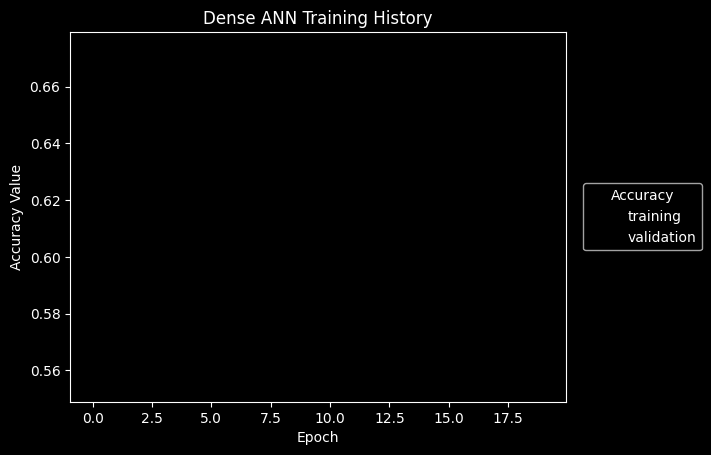

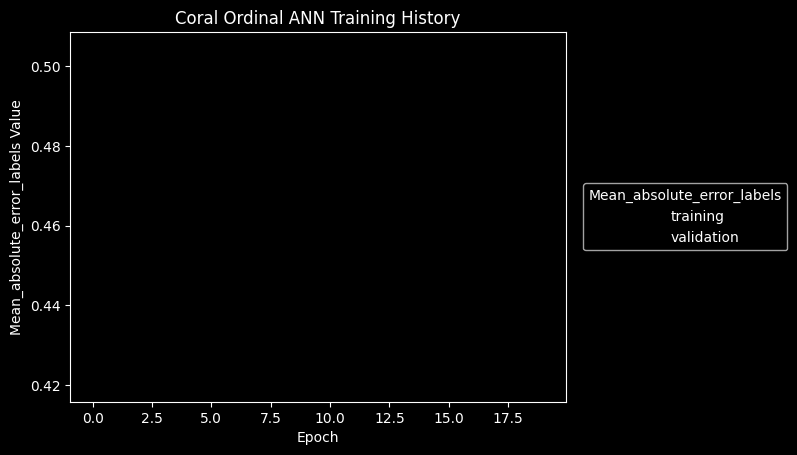

In [18]:
cmap = matplotlib.colormaps["Dark2"]


def plot_history_from_df_row(row):
    """Plot the history with the parameters from a row in a DataFrame"""
    plt.figure()
    plot_training_history(
        model=row["model"],
        history=row["history"],
        metric=row["metric"],
        training_options={"linestyle": "--", "color": cmap(row["i_color"])},
        validation_options={"color": cmap(row["i_color"])},
    )


models_df.apply(plot_history_from_df_row, axis=1)

# Conclusion
The applied ann do not provide better predictions than the conventional models from notebook 2.
It is noticeable that the training hardly provides any improvement over the different epochs,
as seen in the validation loss.